In [ ]:
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
from scipy.signal import argrelextrema
#first need to import the files from Google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
CSI_Am_D = drive.CreateFile({'id':'1W_dSYpoWHqmoJDTGDmAhPmMzPgNvxcix'}) 
CSI_Am_D.GetContentFile('Am241-CSI-fvsVth 2.0.xlsx')

CSI_Cs_D = drive.CreateFile({'id':'1TW10zFXGMGQJPTM5TP3Or6hjZNZxn_1q'}) 
CSI_Cs_D.GetContentFile('Cs137 CSI crystal Noise and CPS.xlsx')

CSI_Co_D = drive.CreateFile({'id':'1Funik3p4P5uamRA8YHuRLzPR8Jwd_HdA'}) 
CSI_Co_D.GetContentFile('Co60-CSI-fvVth-Noise.xlsx')

BGO_Am_D = drive.CreateFile({'id':'1KHk8gGaa-WN51bQN8K6x6lncYzKX83bp'}) 
BGO_Am_D.GetContentFile('Am241-BGO-fvVth-Noise.xlsx')


BGO_Cs_D2 = drive.CreateFile({'id':'1FItEp5uDChmQymz5a7o3gZO-YcGev7Nx'}) 
BGO_Cs_D2.GetContentFile('Cs137 CGO crystal Noise fvVth3.xlsx')
BGO_Cs_D3 = drive.CreateFile({'id':'1wzszVEiz_T36bT5Wj5olyZWQ12VJNpSq'}) 
BGO_Cs_D3.GetContentFile('Cs137-BGO-fvVth-Noise.xlsx')

BGO_Co_D = drive.CreateFile({'id':'1MJHV74GU7QTyYVrKiPQdtAt0LUEaIj0L'}) 
BGO_Co_D.GetContentFile('Co60-BGO-fvVth-Noise.xlsx')

LYSO_Am_D = drive.CreateFile({'id':'1WS4vvRiwJ3HekzyZKpi8VNH37hxFxBcK'}) 
LYSO_Am_D.GetContentFile('AM241-LYSO-FREQVSVOLTAGE-NOISE.xlsx')

LYSO_Cs_D = drive.CreateFile({'id':'1THRMguI0WIPZnRWWe47jeWJatBpeM3HU'}) 
LYSO_Cs_D.GetContentFile('Cs137-LYSO-fvVth Noise.xlsx')


LYSO_Co_D2 = drive.CreateFile({'id':'1yJumyFYa4yPaANUyskOBUr-1l3UA1GPx'}) 
LYSO_Co_D2.GetContentFile('Co60-LYSO-fvVth-Noise2.xlsx')




The maximmum SNR is 1578.5000000000002
The row number of the max SNR is 8
The max VTh from SNR is -23 
The max frequency from SNR is 3.7884
The max absolute efficiency is 0.013491999999999999
The row number of the max absolute efficiency is 6
The max VTh from absolute efficiency is -19
The max frequency from absolute efficiency is 5.3968
The max intrinsic efficiency is 0.026983999999999998
The row number of the max intrinsic efficiency is 6
The max VTh from intrinsic efficiency is -19
The max frequency from intrinsic efficiency is 5.3968


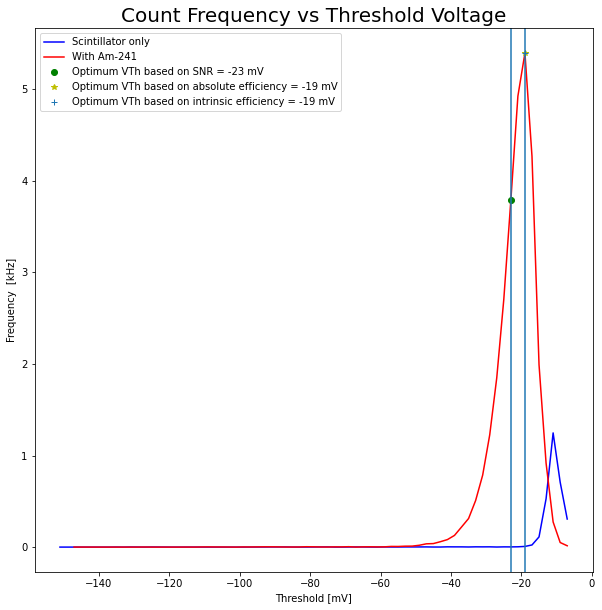

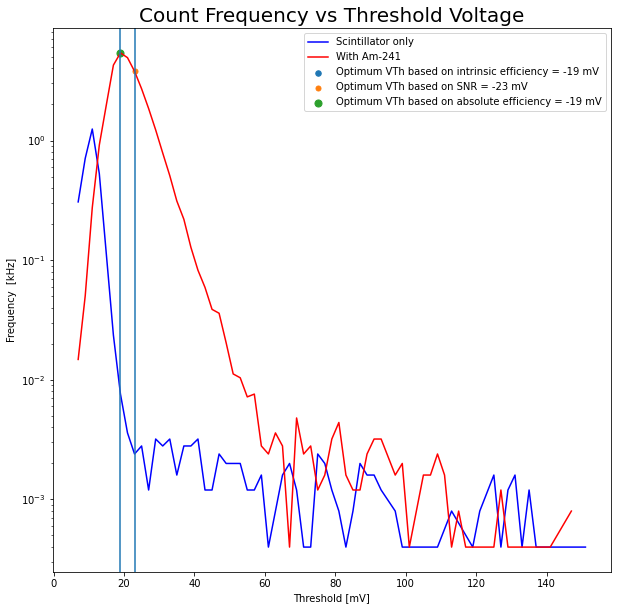

Therefore based on the SNR, absolute and intrinsic efficiencies the optimum approximate VTh is between -19 and -23 for Am-241 in the CSI crystal


In [ ]:
#Count Frequency vs Threshold Voltage
#CSI
#Am241
#Parameters
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd

CSI_Am = pd.read_excel('Am241-CSI-fvsVth 2.0.xlsx', usecols = [2,3,4,5])
CSI_Am.drop([0])

#Find Signal to Noise Ratio
CSI_Am['Signal to Noise Ratio'] = CSI_Am['Frequency  [kHz] - With Source']/CSI_Am['Frequency  [kHz] - With Scintillator']
max_SNR = CSI_Am['Signal to Noise Ratio'].max()
index_max_SNR = CSI_Am['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR}')
print(f'The row number of the max SNR is {index_max_SNR}')
frequency_max_SNR = CSI_Am.at[index_max_SNR, 'Frequency  [kHz] - With Source']
VTh_max_SNR = CSI_Am.at[index_max_SNR, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR} ')
print(f'The max frequency from SNR is {frequency_max_SNR}')

#Find Absolute and Intrinsic Efficiency
Am_Activity_MBq = 400
CSI_Am['Absolute Efficiency'] = CSI_Am['Frequency  [kHz] - With Source']/ Am_Activity_MBq
max_Abs_Efficiency = CSI_Am['Absolute Efficiency'].max()
index_max_Abs_Eff = CSI_Am['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff}')
frequency_max_Abs_Eff = CSI_Am.at[index_max_Abs_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff = CSI_Am.at[index_max_Abs_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff}')

CSI_Am['Intrinsic Efficiency'] = CSI_Am['Frequency  [kHz] - With Source']/ (0.5*Am_Activity_MBq)
max_Intr_Efficiency = CSI_Am['Intrinsic Efficiency'].max()
index_max_Intr_Eff = CSI_Am['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff}')
frequency_max_Intr_Eff = CSI_Am.at[index_max_Intr_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff = CSI_Am.at[index_max_Intr_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff}')

plt.figure(figsize = (10,10))
plt.plot(CSI_Am['Threshold [mV] - With Scintillator'],CSI_Am['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(CSI_Am['Threshold [mV] - With Source'],CSI_Am['Frequency  [kHz] - With Source'],'r',label = 'With Am-241')
plt.plot(VTh_max_SNR,frequency_max_SNR, 'go', linewidth = 1000000, label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.plot(VTh_max_Abs_Eff,frequency_max_Abs_Eff, 'y*', label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.plot(VTh_max_Intr_Eff,frequency_max_Intr_Eff, '+', label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.axvline(x = VTh_max_SNR)
plt.axvline(x = VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()


#plot logarithmically

#plt.figure(figsize = (10,10))
#plt.loglog(-1*CSI_Am['Threshold [mV] - With Scintillator'],CSI_Am['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
#plt.loglog(-1*CSI_Am['Threshold [mV] - With Source'],CSI_Am['Frequency  [kHz] - With Source'],'r',label = 'With Am-241')
#plt.loglog(VTh_max_SNR,frequency_max_SNR, 'go', label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
##plt.loglog(VTh_max_Abs_Eff,frequency_max_Abs_Eff, 'y*', label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
#plt.loglog(VTh_max_Intr_Eff,frequency_max_Intr_Eff, '+', label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
#plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
#plt.xlabel('Threshold [mV]')
#plt.ylabel('Frequency  [kHz]')
#plt.legend()
#plt.show()

plt.figure(figsize = (10,10))
plt.plot(-1*CSI_Am['Threshold [mV] - With Scintillator'],CSI_Am['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(-1*CSI_Am['Threshold [mV] - With Source'],CSI_Am['Frequency  [kHz] - With Source'],'r',label = 'With Am-241')
plt.scatter(-1*VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 30, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(-1*VTh_max_SNR,frequency_max_SNR, s = 25,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(-1*VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 50,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = -1*VTh_max_SNR)
plt.axvline(x = -1*VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

print(f'Therefore based on the SNR, absolute and intrinsic efficiencies the optimum approximate VTh is between {VTh_max_Intr_Eff} and {VTh_max_SNR} for Am-241 in the CSI crystal')

In [ ]:
#Count Frequency vs Threshold Voltage
#CSI
#Cs137
#Parameters

CSI_Cs = pd.read_excel('Cs137 CSI crystal Noise and CPS.xlsx', usecols = [2,3,4,5])
CSI_Cs.drop([0])

#Find Signal to Noise Ratio
CSI_Cs['Signal to Noise Ratio'] = CSI_Cs['Frequency  [kHz] - With Source']/CSI_Cs['Frequency  [kHz] - With Scintillator']
max_SNR = CSI_Cs['Signal to Noise Ratio'].max()
index_max_SNR = CSI_Cs['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR}')
print(f'The row number of the max SNR is {index_max_SNR}')
frequency_max_SNR = CSI_Cs.at[index_max_SNR, 'Frequency  [kHz] - With Source']
VTh_max_SNR = CSI_Cs.at[index_max_SNR, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR}')
print(f'The max frequency from SNR is {frequency_max_SNR}')

#Find Absolute and Intrinsic Efficiency
Cs_Activity_MBq = 193
CSI_Cs['Absolute Efficiency'] = CSI_Cs['Frequency  [kHz] - With Source']/ Cs_Activity_MBq
max_Abs_Efficiency = CSI_Cs['Absolute Efficiency'].max()
index_max_Abs_Eff = CSI_Cs['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff}')
frequency_max_Abs_Eff = CSI_Cs.at[index_max_Abs_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff = CSI_Cs.at[index_max_Abs_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff}')

CSI_Cs['Intrinsic Efficiency'] = CSI_Cs['Frequency  [kHz] - With Source']/ (0.5*Cs_Activity_MBq)
max_Intr_Efficiency = CSI_Cs['Intrinsic Efficiency'].max()
index_max_Intr_Eff = CSI_Cs['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff}')
frequency_max_Intr_Eff = CSI_Cs.at[index_max_Intr_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff = CSI_Cs.at[index_max_Intr_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff}')

plt.figure(figsize = (10,10))
plt.plot(CSI_Cs['Threshold [mV] - With Scintillator'],CSI_Cs['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(CSI_Cs['Threshold [mV] - With Source'],CSI_Cs['Frequency  [kHz] - With Source'],'r',label = 'With Cs-137')
plt.plot(VTh_max_SNR,frequency_max_SNR, 'go', linewidth = 1000000, label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.plot(VTh_max_Abs_Eff,frequency_max_Abs_Eff, 'y*', label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.plot(VTh_max_Intr_Eff,frequency_max_Intr_Eff, '+', label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.axvline(x = VTh_max_SNR)
plt.axvline(x = VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()


plt.figure(figsize = (10,10))
plt.plot(-1*CSI_Cs['Threshold [mV] - With Scintillator'],CSI_Cs['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(-1*CSI_Cs['Threshold [mV] - With Source'],CSI_Cs['Frequency  [kHz] - With Source'],'r',label = 'With Cs-137')
plt.scatter(-1*VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 30, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(-1*VTh_max_SNR,frequency_max_SNR, s = 25,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(-1*VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 50,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = -1*VTh_max_SNR)
plt.axvline(x = -1*VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

print(f'Therefore based on the SNR, absolute and intrinsic efficiencies the optimum approximate VTh is between {VTh_max_Intr_Eff} and {VTh_max_SNR} for Cs-137 in the CSI crystal')

In [ ]:
#Count Frequency vs Threshold Voltage
#CSI
#Co60
#Parameters

CSI_Co = pd.read_excel('Co60-CSI-fvVth-Noise.xlsx', usecols = [2,3,4,5])
CSI_Co.drop([0])

#Find Signal to Noise Ratio
CSI_Co['Signal to Noise Ratio'] = CSI_Co['Frequency  [kHz] - With Source']/CSI_Co['Frequency  [kHz] - With Scintillator']
max_SNR = CSI_Co['Signal to Noise Ratio'].max()
index_max_SNR = CSI_Co['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR}')
print(f'The row number of the max SNR is {index_max_SNR}')
frequency_max_SNR = CSI_Co.at[index_max_SNR, 'Frequency  [kHz] - With Source']
VTh_max_SNR = CSI_Co.at[index_max_SNR, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR}')
print(f'The max frequency from SNR is {frequency_max_SNR}')

#Find Absolute and Intrinsic Efficiency
Co_Activity_MBq = 328
CSI_Co['Absolute Efficiency'] = CSI_Co['Frequency  [kHz] - With Source']/ Co_Activity_MBq
max_Abs_Efficiency = CSI_Co['Absolute Efficiency'].max()
index_max_Abs_Eff = CSI_Co['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff}')
frequency_max_Abs_Eff = CSI_Co.at[index_max_Abs_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff = CSI_Co.at[index_max_Abs_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff}')

CSI_Co['Intrinsic Efficiency'] = CSI_Co['Frequency  [kHz] - With Source']/ (0.5*Co_Activity_MBq)
max_Intr_Efficiency = CSI_Co['Intrinsic Efficiency'].max()
index_max_Intr_Eff = CSI_Co['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff}')
frequency_max_Intr_Eff = CSI_Co.at[index_max_Intr_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff = CSI_Co.at[index_max_Intr_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff}')

plt.figure(figsize = (10,10))
plt.plot(CSI_Co['Threshold [mV] - With Scintillator'],CSI_Co['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(CSI_Co['Threshold [mV] - With Source'],CSI_Co['Frequency  [kHz] - With Source'],'r',label = 'With Co-60')
plt.plot(VTh_max_SNR,frequency_max_SNR, 'go', linewidth = 1000000, label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.plot(VTh_max_Abs_Eff,frequency_max_Abs_Eff, 'y*', label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.plot(VTh_max_Intr_Eff,frequency_max_Intr_Eff, '+', label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.axvline(x = VTh_max_SNR)
plt.axvline(x = VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()


plt.figure(figsize = (10,10))
plt.plot(-1*CSI_Co['Threshold [mV] - With Scintillator'],CSI_Co['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(-1*CSI_Co['Threshold [mV] - With Source'],CSI_Co['Frequency  [kHz] - With Source'],'r',label = 'With Co-60')
plt.scatter(-1*VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 30, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(-1*VTh_max_SNR,frequency_max_SNR, s = 25,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(-1*VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 50,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = -1*VTh_max_SNR)
plt.axvline(x = -1*VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

print(f'Therefore based on the SNR, absolute and intrinsic efficiencies the optimum approximate VTh is between {VTh_max_Intr_Eff} and {VTh_max_SNR} for Co-60 in the CSI crystal')



In [ ]:
#Count Frequency vs Threshold Voltage
#BGO
#Am241
#Parameters


BGO_Am = pd.read_excel('Am241-BGO-fvVth-Noise.xlsx', usecols = [2,3,4,5])
BGO_Am.drop([0])

#Find Signal to Noise Ratio
BGO_Am['Signal to Noise Ratio'] = BGO_Am['Frequency  [kHz] - With Source']/BGO_Am['Frequency  [kHz] - With Scintillator']
max_SNR = BGO_Am['Signal to Noise Ratio'].max()
index_max_SNR = BGO_Am['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR}')
print(f'The row number of the max SNR is {index_max_SNR}')
frequency_max_SNR = BGO_Am.at[index_max_SNR, 'Frequency  [kHz] - With Source']
VTh_max_SNR = BGO_Am.at[index_max_SNR, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR}')
print(f'The max frequency from SNR is {frequency_max_SNR}')

#Find Absolute and Intrinsic Efficiency
Am_Activity_MBq = 400
BGO_Am['Absolute Efficiency'] = BGO_Am['Frequency  [kHz] - With Source']/ Am_Activity_MBq
max_Abs_Efficiency = BGO_Am['Absolute Efficiency'].max()
index_max_Abs_Eff = BGO_Am['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff}')
frequency_max_Abs_Eff = BGO_Am.at[index_max_Abs_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff = BGO_Am.at[index_max_Abs_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff}')

BGO_Am['Intrinsic Efficiency'] = BGO_Am['Frequency  [kHz] - With Source']/ (0.5*Am_Activity_MBq)
max_Intr_Efficiency = BGO_Am['Intrinsic Efficiency'].max()
index_max_Intr_Eff = BGO_Am['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff}')
frequency_max_Intr_Eff = BGO_Am.at[index_max_Intr_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff = BGO_Am.at[index_max_Intr_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff}')

plt.figure(figsize = (10,10))
plt.plot(BGO_Am['Threshold [mV] - With Scintillator'],BGO_Am['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(BGO_Am['Threshold [mV] - With Source'],BGO_Am['Frequency  [kHz] - With Source'],'r',label = 'With Am-241')
plt.plot(VTh_max_SNR,frequency_max_SNR, 'go', linewidth = 1000000, label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.plot(VTh_max_Abs_Eff,frequency_max_Abs_Eff, 'y*', label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.plot(VTh_max_Intr_Eff,frequency_max_Intr_Eff, '+', label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.axvline(x = VTh_max_SNR)
plt.axvline(x = VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()



plt.figure(figsize = (10,10))
plt.plot(-1*BGO_Am['Threshold [mV] - With Scintillator'],BGO_Am['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(-1*BGO_Am['Threshold [mV] - With Source'],BGO_Am['Frequency  [kHz] - With Source'],'r',label = 'With Am-241')
plt.scatter(-1*VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 30, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(-1*VTh_max_SNR,frequency_max_SNR, s = 25,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(-1*VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 50,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = -1*VTh_max_SNR)
plt.axvline(x = -1*VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

print(f'Therefore based on the SNR, absolute and intrinsic efficiencies the optimum approximate VTh is between {VTh_max_Intr_Eff} and {VTh_max_SNR} for Am-241 in the BGO crystal')

In [ ]:
#Count Frequency vs Threshold Voltage
#BGO
#Cs137
#Parameters


BGO_Cs2 = pd.read_excel('Cs137 CGO crystal Noise fvVth3.xlsx', usecols = [2,3,4,5])
BGO_Cs3 = pd.read_excel('Cs137-BGO-fvVth-Noise.xlsx', usecols = [2,3,4,5])

BGO_Cs2.drop([0])
BGO_Cs3.drop([0])
print(BGO_Cs2)
#Find Signal to Noise Ratio

#Cs2
BGO_Cs2['Signal to Noise Ratio'] = BGO_Cs2['Frequency  [kHz] - With Source']/BGO_Cs2['Frequency  [kHz] - With Scintillator']
max_SNR2 = BGO_Cs2['Signal to Noise Ratio'].max()
index_max_SNR2 = BGO_Cs2['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR2}')
print(f'The row number of the max SNR is {index_max_SNR2}')
frequency_max_SNR2 = BGO_Cs2.at[index_max_SNR2, 'Frequency  [kHz] - With Source']
VTh_max_SNR2 = BGO_Cs2.at[index_max_SNR2, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR}')
print(f'The max frequency from SNR is {frequency_max_SNR}')

#Cs3
BGO_Cs3['Signal to Noise Ratio'] = BGO_Cs3['Frequency  [kHz] - With Source']/BGO_Cs3['Frequency  [kHz] - With Scintillator']
max_SNR3 = BGO_Cs3['Signal to Noise Ratio'].max()
index_max_SNR3 = BGO_Cs3['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR3}')
print(f'The row number of the max SNR is {index_max_SNR3}')
frequency_max_SNR3 = BGO_Cs3.at[index_max_SNR3, 'Frequency  [kHz] - With Source']
VTh_max_SNR3 = BGO_Cs3.at[index_max_SNR3, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR3}')
print(f'The max frequency from SNR is {frequency_max_SNR3}')#

#Find Absolute and Intrinsic Efficiency

#Cs2
Cs_Activity_MBq = 193
BGO_Cs2['Absolute Efficiency'] = BGO_Cs2['Frequency  [kHz] - With Source']/ Cs_Activity_MBq
max_Abs_Efficiency2 = BGO_Cs2['Absolute Efficiency'].max()
index_max_Abs_Eff2 = BGO_Cs2['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency2}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff2}')
frequency_max_Abs_Eff2 = BGO_Cs2.at[index_max_Abs_Eff2, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff2 = BGO_Cs2.at[index_max_Abs_Eff2, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff2}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff2}')
BGO_Cs2['Intrinsic Efficiency'] = BGO_Cs2['Frequency  [kHz] - With Source']/ (0.5*Cs_Activity_MBq)
max_Intr_Efficiency2 = BGO_Cs2['Intrinsic Efficiency'].max()
index_max_Intr_Eff2 = BGO_Cs2['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency2}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff2}')
frequency_max_Intr_Eff2 = BGO_Cs2.at[index_max_Intr_Eff2, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff2 = BGO_Cs2.at[index_max_Intr_Eff2, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff2}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff2}')#

#Cs3
Cs_Activity_MBq = 193
BGO_Cs3['Absolute Efficiency'] = BGO_Cs3['Frequency  [kHz] - With Source']/ Cs_Activity_MBq
max_Abs_Efficiency3 = BGO_Cs3['Absolute Efficiency'].max()
index_max_Abs_Eff3 = BGO_Cs3['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency3}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff3}')
frequency_max_Abs_Eff3 = BGO_Cs3.at[index_max_Abs_Eff3, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff3 = BGO_Cs3.at[index_max_Abs_Eff3, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff3}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff3}')
BGO_Cs3['Intrinsic Efficiency'] = BGO_Cs3['Frequency  [kHz] - With Source']/ (0.5*Cs_Activity_MBq)
max_Intr_Efficiency3 = BGO_Cs3['Intrinsic Efficiency'].max()
index_max_Intr_Eff3 = BGO_Cs3['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency3}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff3}')
frequency_max_Intr_Eff3 = BGO_Cs3.at[index_max_Intr_Eff3, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff3 = BGO_Cs3.at[index_max_Intr_Eff3, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff3}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff3}')

plt.figure(figsize = (10,10))
plt.plot(BGO_Cs2['Threshold [mV] - With Scintillator'],BGO_Cs2['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(BGO_Cs2['Threshold [mV] - With Source'],BGO_Cs2['Frequency  [kHz] - With Source'],'r',label = 'With Cs-137')
plt.plot(VTh_max_SNR2,frequency_max_SNR2, 'go', linewidth = 1000000, label = f'Optimum VTh based on SNR = {VTh_max_SNR2} mV')
plt.plot(VTh_max_Abs_Eff2,frequency_max_Abs_Eff2, 'y*', label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff2} mV')
plt.plot(VTh_max_Intr_Eff2,frequency_max_Intr_Eff2, '+', label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff2} mV')
plt.axvline(x = VTh_max_SNR2)
plt.axvline(x = VTh_max_Abs_Eff2)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()


plt.figure(figsize = (10,10))
plt.plot(-1*BGO_Cs2['Threshold [mV] - With Scintillator'],BGO_Cs2['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(-1*BGO_Cs2['Threshold [mV] - With Source'],BGO_Cs2['Frequency  [kHz] - With Source'],'r',label = 'With Cs-137')
plt.scatter(-1*VTh_max_Intr_Eff2,frequency_max_Intr_Eff2, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff2} mV')
plt.scatter(-1*VTh_max_SNR2,frequency_max_SNR2, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR2} mV')
plt.scatter(-1*VTh_max_Abs_Eff2,frequency_max_Abs_Eff2, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff2} mV')
plt.axvline(x = -1*VTh_max_SNR2)
plt.axvline(x = -1*VTh_max_Abs_Eff2)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

plt.figure(figsize = (10,10))
plt.plot(BGO_Cs2['Threshold [mV] - With Scintillator'],BGO_Cs2['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only T2')
plt.plot(BGO_Cs2['Threshold [mV] - With Source'],BGO_Cs2['Frequency  [kHz] - With Source'],'r',label = 'With Cs-137 T2')
plt.plot(BGO_Cs3['Threshold [mV] - With Scintillator'],BGO_Cs3['Frequency  [kHz] - With Scintillator'],'g',label = 'Scintillator only T3')
plt.plot(BGO_Cs3['Threshold [mV] - With Source'],BGO_Cs3['Frequency  [kHz] - With Source'],'y',label = 'With Cs-137 T3')
plt.scatter(VTh_max_Intr_Eff2,frequency_max_Intr_Eff2, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff2} mV T2')
plt.scatter(VTh_max_SNR2,frequency_max_SNR2, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR2} mV T2')
plt.scatter(VTh_max_Abs_Eff2,frequency_max_Abs_Eff2, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff2} mV T2')
plt.scatter(VTh_max_Intr_Eff3,frequency_max_Intr_Eff3, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff3} mV T3')
plt.scatter(VTh_max_SNR3,frequency_max_SNR3, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR3} mV T3')
plt.scatter(VTh_max_Abs_Eff3,frequency_max_Abs_Eff3, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff3} mV T3')
plt.axvline(x = VTh_max_SNR2)
plt.axvline(x = VTh_max_Abs_Eff2)
plt.axvline(x = VTh_max_SNR3)
plt.axvline(x = VTh_max_Abs_Eff3)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()


plt.figure(figsize = (10,10))
plt.plot(-1*BGO_Cs2['Threshold [mV] - With Scintillator'],BGO_Cs2['Frequency  [kHz] - With Scintillator'], 'b',label = 'Scintillator only T2')
plt.plot(-1*BGO_Cs2['Threshold [mV] - With Source'],BGO_Cs2['Frequency  [kHz] - With Source'],'r',label = 'With Cs-137 T2')
plt.plot(-1*BGO_Cs3['Threshold [mV] - With Scintillator'],BGO_Cs3['Frequency  [kHz] - With Scintillator'],'g',label = 'Scintillator only T3')
plt.plot(-1*BGO_Cs3['Threshold [mV] - With Source'],BGO_Cs3['Frequency  [kHz] - With Source'],'y',label = 'With Cs-137 T3')
plt.scatter(-1*VTh_max_Intr_Eff2,frequency_max_Intr_Eff2, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff2} mV T2')
plt.scatter(-1*VTh_max_SNR2,frequency_max_SNR2, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR2} mV T2')
plt.scatter(-1*VTh_max_Abs_Eff2,frequency_max_Abs_Eff2, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff2} mV T2')
plt.scatter(-1*VTh_max_Intr_Eff3,frequency_max_Intr_Eff3, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff3} mV T3')
plt.scatter(-1*VTh_max_SNR3,frequency_max_SNR3, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR3} mV T3')
plt.scatter(-1*VTh_max_Abs_Eff3,frequency_max_Abs_Eff3, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff3} mV T3')
plt.axvline(x = -1*VTh_max_SNR2)
plt.axvline(x = -1*VTh_max_Abs_Eff2)
plt.axvline(x = -1*VTh_max_SNR3)
plt.axvline(x = -1*VTh_max_Abs_Eff3)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

print(VTh_max_SNR2,frequency_max_SNR2)
Ave_VTh_max_Intr_Eff =  ( VTh_max_Intr_Eff2 + VTh_max_Intr_Eff3) /2
Ave_VTh_max_SNR = ( VTh_max_SNR2 + VTh_max_SNR3)/2
print(f'Therefore based on the averages of the SNR, absolute and intrinsic efficiencies from the two tests the optimum approximate VTh is between {Ave_VTh_max_Intr_Eff} and {Ave_VTh_max_SNR} for Cs-137 in the BGO crystal')

In [ ]:
#Count Frequency vs Threshold Voltage
#BGO
#Co60
#Parameters

BGO_Co = pd.read_excel('Co60-BGO-fvVth-Noise.xlsx', usecols = [2,3,4,5])
BGO_Co.drop([0])

#Find Signal to Noise Ratio
BGO_Co['Signal to Noise Ratio'] = BGO_Co['Frequency  [kHz] - With Source']/BGO_Co['Frequency  [kHz] - With Scintillator']
max_SNR = BGO_Co['Signal to Noise Ratio'].max()
index_max_SNR = BGO_Co['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR}')
print(f'The row number of the max SNR is {index_max_SNR}')
frequency_max_SNR = BGO_Co.at[index_max_SNR, 'Frequency  [kHz] - With Source']
VTh_max_SNR = BGO_Co.at[index_max_SNR, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR}')
print(f'The max frequency from SNR is {frequency_max_SNR}')

#Find Absolute and Intrinsic Efficiency
Co_Activity_MBq = 328
BGO_Co['Absolute Efficiency'] = BGO_Co['Frequency  [kHz] - With Source']/ Co_Activity_MBq
max_Abs_Efficiency = BGO_Co['Absolute Efficiency'].max()
index_max_Abs_Eff = BGO_Co['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff}')
frequency_max_Abs_Eff = BGO_Co.at[index_max_Abs_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff = BGO_Co.at[index_max_Abs_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff}')

BGO_Co['Intrinsic Efficiency'] = BGO_Co['Frequency  [kHz] - With Source']/ (0.5*Co_Activity_MBq)
max_Intr_Efficiency = BGO_Co['Intrinsic Efficiency'].max()
index_max_Intr_Eff = BGO_Co['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff}')
frequency_max_Intr_Eff = BGO_Co.at[index_max_Intr_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff = BGO_Co.at[index_max_Intr_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff}')

plt.figure(figsize = (10,10))
plt.plot(BGO_Co['Threshold [mV] - With Scintillator'],BGO_Co['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(BGO_Co['Threshold [mV] - With Source'],BGO_Co['Frequency  [kHz] - With Source'],'r',label = 'With Co-60')
plt.scatter(VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(VTh_max_SNR,frequency_max_SNR, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = VTh_max_SNR)
plt.axvline(x = VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()




plt.figure(figsize = (10,10))
plt.plot(-1*BGO_Co['Threshold [mV] - With Scintillator'],BGO_Co['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(-1*BGO_Co['Threshold [mV] - With Source'],BGO_Co['Frequency  [kHz] - With Source'],'r',label = 'With Co-60')
plt.scatter(-1*VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(-1*VTh_max_SNR,frequency_max_SNR, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(-1*VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = -1*VTh_max_SNR)
plt.axvline(x = -1*VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

print(f'Therefore based on the SNR, absolute and intrinsic efficiencies the optimum approximate VTh is between {VTh_max_Intr_Eff} and {VTh_max_SNR} for Co-60 for BGO crystal')

In [ ]:
#Count Frequency vs Threshold Voltage
#LYSO
#Am241
#Parameters

LYSO_Am = pd.read_excel('AM241-LYSO-FREQVSVOLTAGE-NOISE.xlsx', usecols = [2,3,4,5])
LYSO_Am.drop([0])

#Find Signal to Noise Ratio
LYSO_Am['Signal to Noise Ratio'] = LYSO_Am['Frequency  [kHz] - With Source']/LYSO_Am['Frequency  [kHz] - With Scintillator']
max_SNR = LYSO_Am['Signal to Noise Ratio'].max()
index_max_SNR = LYSO_Am['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR}')
print(f'The row number of the max SNR is {index_max_SNR}')
frequency_max_SNR = LYSO_Am.at[index_max_SNR, 'Frequency  [kHz] - With Source']
VTh_max_SNR = LYSO_Am.at[index_max_SNR, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR}')
print(f'The max frequency from SNR is {frequency_max_SNR}')

#Find Absolute and Intrinsic Efficiency
Am_Activity_MBq = 400
LYSO_Am['Absolute Efficiency'] = LYSO_Am['Frequency  [kHz] - With Source']/ Am_Activity_MBq
max_Abs_Efficiency = LYSO_Am['Absolute Efficiency'].max()
index_max_Abs_Eff = LYSO_Am['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff}')
frequency_max_Abs_Eff = LYSO_Am.at[index_max_Abs_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff = LYSO_Am.at[index_max_Abs_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff}')

LYSO_Am['Intrinsic Efficiency'] = LYSO_Am['Frequency  [kHz] - With Source']/ (0.5*Am_Activity_MBq)
max_Intr_Efficiency = LYSO_Am['Intrinsic Efficiency'].max()
index_max_Intr_Eff = LYSO_Am['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff}')
frequency_max_Intr_Eff = LYSO_Am.at[index_max_Intr_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff = LYSO_Am.at[index_max_Intr_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff}')

plt.figure(figsize = (10,10))
plt.plot(LYSO_Am['Threshold [mV] - With Scintillator'],LYSO_Am['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(LYSO_Am['Threshold [mV] - With Source'],LYSO_Am['Frequency  [kHz] - With Source'],'r',label = 'With Am-241')
plt.scatter(VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(VTh_max_SNR,frequency_max_SNR, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = VTh_max_SNR)
plt.axvline(x = VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()




plt.figure(figsize = (10,10))
plt.plot(-1*LYSO_Am['Threshold [mV] - With Scintillator'],LYSO_Am['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(-1*LYSO_Am['Threshold [mV] - With Source'],LYSO_Am['Frequency  [kHz] - With Source'],'r',label = 'With Am-241')
plt.scatter(-1*VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(-1*VTh_max_SNR,frequency_max_SNR, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(-1*VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = -1*VTh_max_SNR)
plt.axvline(x = -1*VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

print(f'Therefore based on the SNR, absolute and intrinsic efficiencies the optimum approximate VTh is between {VTh_max_Intr_Eff} and {VTh_max_SNR} for Am-241 for LYSO crystal')

In [ ]:
#Count Frequency vs Threshold Voltage
#LYSO
#Cs137
#Parameters

BGO_Cs = pd.read_excel('Cs137-LYSO-fvVth Noise.xlsx', usecols = [2,3,4,5])
BGO_Cs.drop([0])

#Find Signal to Noise Ratio
BGO_Cs['Signal to Noise Ratio'] = BGO_Cs['Frequency  [kHz] - With Source']/BGO_Cs['Frequency  [kHz] - With Scintillator']
max_SNR = BGO_Cs['Signal to Noise Ratio'].max()
index_max_SNR = BGO_Cs['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR}')
print(f'The row number of the max SNR is {index_max_SNR}')
frequency_max_SNR = BGO_Cs.at[index_max_SNR, 'Frequency  [kHz] - With Source']
VTh_max_SNR = BGO_Cs.at[index_max_SNR, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR}')
print(f'The max frequency from SNR is {frequency_max_SNR}')

#Find Absolute and Intrinsic Efficiency
Cs_Activity_MBq = 193
BGO_Cs['Absolute Efficiency'] = BGO_Cs['Frequency  [kHz] - With Source']/ Cs_Activity_MBq
max_Abs_Efficiency = BGO_Cs['Absolute Efficiency'].max()
index_max_Abs_Eff = BGO_Cs['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff}')
frequency_max_Abs_Eff = BGO_Cs.at[index_max_Abs_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff = BGO_Cs.at[index_max_Abs_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff}')

BGO_Cs['Intrinsic Efficiency'] = BGO_Cs['Frequency  [kHz] - With Source']/ (0.5*Cs_Activity_MBq)
max_Intr_Efficiency = BGO_Cs['Intrinsic Efficiency'].max()
index_max_Intr_Eff = BGO_Cs['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff}')
frequency_max_Intr_Eff = BGO_Cs.at[index_max_Intr_Eff, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff = BGO_Cs.at[index_max_Intr_Eff, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff}')

plt.figure(figsize = (10,10))
plt.plot(BGO_Cs['Threshold [mV] - With Scintillator'],BGO_Cs['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(BGO_Cs['Threshold [mV] - With Source'],BGO_Cs['Frequency  [kHz] - With Source'],'r',label = 'With Cos-137')
plt.scatter(VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(VTh_max_SNR,frequency_max_SNR, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = VTh_max_SNR)
plt.axvline(x = VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()




plt.figure(figsize = (10,10))
plt.plot(-1*BGO_Cs['Threshold [mV] - With Scintillator'],BGO_Cs['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(-1*BGO_Cs['Threshold [mV] - With Source'],BGO_Cs['Frequency  [kHz] - With Source'],'r',label = 'With Cs-137')
plt.scatter(-1*VTh_max_Intr_Eff,frequency_max_Intr_Eff, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff} mV')
plt.scatter(-1*VTh_max_SNR,frequency_max_SNR, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR} mV')
plt.scatter(-1*VTh_max_Abs_Eff,frequency_max_Abs_Eff, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff} mV')
plt.axvline(x = -1*VTh_max_SNR)
plt.axvline(x = -1*VTh_max_Abs_Eff)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

print(f'Therefore based on the SNR, absolute and intrinsic efficiencies the optimum approximate VTh is between {VTh_max_Intr_Eff} and {VTh_max_SNR} for Cs-137 for LYSO crystal')

In [ ]:
#Count Frequency vs Threshold Voltage
#LYSO
#Co60
#Parameters


LYSO_Co2 = pd.read_excel('Co60-LYSO-fvVth-Noise2.xlsx', usecols = [2,3,4,5])


LYSO_Co2.drop([0])
print(LYSO_Co2)
#Find Signal to Noise Ratio

#Co2
LYSO_Co2['Signal to Noise Ratio'] = LYSO_Co2['Frequency  [kHz] - With Source']/LYSO_Co2['Frequency  [kHz] - With Scintillator']
max_SNR3 = LYSO_Co2['Signal to Noise Ratio'].max()
index_max_SNR3 = LYSO_Co2['Signal to Noise Ratio'].idxmax()
print(f'The maximmum SNR is {max_SNR3}')
print(f'The row number of the max SNR is {index_max_SNR3}')
frequency_max_SNR3 = LYSO_Co2.at[index_max_SNR3, 'Frequency  [kHz] - With Source']
VTh_max_SNR3 = LYSO_Co2.at[index_max_SNR3, 'Threshold [mV] - With Source']
print(f'The max VTh from SNR is {VTh_max_SNR3}')
print(f'The max frequency from SNR is {frequency_max_SNR3}')#

#Find Absolute and Intrinsic Efficiency

#Co2
Co_Activity_MBq = 328
LYSO_Co2['Absolute Efficiency'] = LYSO_Co2['Frequency  [kHz] - With Source']/ Co_Activity_MBq
max_Abs_Efficiency3 = LYSO_Co2['Absolute Efficiency'].max()
index_max_Abs_Eff3 = LYSO_Co2['Absolute Efficiency'].idxmax()
print(f'The max absolute efficiency is {max_Abs_Efficiency3}')
print(f'The row number of the max absolute efficiency is {index_max_Abs_Eff3}')
frequency_max_Abs_Eff3 = LYSO_Co2.at[index_max_Abs_Eff3, 'Frequency  [kHz] - With Source']
VTh_max_Abs_Eff3 = LYSO_Co2.at[index_max_Abs_Eff3, 'Threshold [mV] - With Source']
print(f'The max VTh from absolute efficiency is {VTh_max_Abs_Eff3}')
print(f'The max frequency from absolute efficiency is {frequency_max_Abs_Eff3}')
LYSO_Co2['Intrinsic Efficiency'] = LYSO_Co2['Frequency  [kHz] - With Source']/ (0.5*Co_Activity_MBq)
max_Intr_Efficiency3 = LYSO_Co2['Intrinsic Efficiency'].max()
index_max_Intr_Eff3 = LYSO_Co2['Intrinsic Efficiency'].idxmax()
print(f'The max intrinsic efficiency is {max_Intr_Efficiency3}')
print(f'The row number of the max intrinsic efficiency is {index_max_Intr_Eff3}')
frequency_max_Intr_Eff3 = LYSO_Co2.at[index_max_Intr_Eff3, 'Frequency  [kHz] - With Source']
VTh_max_Intr_Eff3 = LYSO_Co2.at[index_max_Intr_Eff3, 'Threshold [mV] - With Source']
print(f'The max VTh from intrinsic efficiency is {VTh_max_Intr_Eff3}')
print(f'The max frequency from intrinsic efficiency is {frequency_max_Intr_Eff3}')

plt.figure(figsize = (10,10))
plt.plot(LYSO_Co2['Threshold [mV] - With Scintillator'],LYSO_Co2['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(LYSO_Co2['Threshold [mV] - With Source'],LYSO_Co2['Frequency  [kHz] - With Source'],'r',label = 'With Co-60')
plt.plot(VTh_max_SNR3,frequency_max_SNR3, 'go', linewidth = 1000000, label = f'Optimum VTh based on SNR = {VTh_max_SNR3} mV')
plt.plot(VTh_max_Abs_Eff3,frequency_max_Abs_Eff3, 'y*', label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff3} mV')
plt.plot(VTh_max_Intr_Eff3,frequency_max_Intr_Eff3, '+', label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff3} mV')
plt.axvline(x = VTh_max_SNR3)
plt.axvline(x = VTh_max_Abs_Eff3)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()


plt.figure(figsize = (10,10))
plt.plot(-1*LYSO_Co2['Threshold [mV] - With Scintillator'],LYSO_Co2['Frequency  [kHz] - With Scintillator'],'b',label = 'Scintillator only')
plt.plot(-1*LYSO_Co2['Threshold [mV] - With Source'],LYSO_Co2['Frequency  [kHz] - With Source'],'r',label = 'With Co-60')
plt.scatter(-1*VTh_max_Intr_Eff3,frequency_max_Intr_Eff3, s = 100, label = f'Optimum VTh based on intrinsic efficiency = {VTh_max_Intr_Eff3} mV')
plt.scatter(-1*VTh_max_SNR3,frequency_max_SNR3, s = 100,  label = f'Optimum VTh based on SNR = {VTh_max_SNR3} mV')
plt.scatter(-1*VTh_max_Abs_Eff3,frequency_max_Abs_Eff3, s = 100,  label = f'Optimum VTh based on absolute efficiency = {VTh_max_Abs_Eff3} mV')
plt.axvline(x = -1*VTh_max_SNR3)
plt.axvline(x = -1*VTh_max_Abs_Eff3)
plt.title('Count Frequency vs Threshold Voltage', fontsize = 20)
plt.yscale('log')
plt.xlabel('Threshold [mV]')
plt.ylabel('Frequency  [kHz]')
plt.legend()
plt.show()

print(f'Therefore based on the SNR, absolute and intrinsic efficiencies the optimum approximate VTh is between {VTh_max_Intr_Eff3} and {VTh_max_SNR3} for Co-60 in the LYSO crystal')

In [ ]:
#Download Histograms

CSI_Am_D = drive.CreateFile({'id':'1PbQ0blYlJitApI1Z7qxQw5ryvNUAJhOq'}) 
CSI_Am_D.GetContentFile('Am241-CSI-ADCvCounts-Th40-G30-2.0.xlsx')
CSI_Am_D1 = drive.CreateFile({'id':'172dazy5LGeQEJDiaD4c5O8gwr9C9_ooT'}) 
CSI_Am_D1.GetContentFile('Am241-CSI-ADCvCounts.xlsx')

CSI_Cs_D = drive.CreateFile({'id':'1JL9g2Dpw1GDnFWuYthpmuMA3jIhNMKhS'}) 
CSI_Cs_D.GetContentFile('Cs137-ADCvCounts-CSI.xlsx')
CSI_Cs_D1 = drive.CreateFile({'id':'1VnrUsOoMn560zviWjUI9360YDDr6QCBA'}) 
CSI_Cs_D1.GetContentFile('Cs137-CSI-ADCvCounts-Th45,G40.xlsx')

CSI_Co_D = drive.CreateFile({'id':'1ZGE4QltBhdObChQ96Hw5m08gg2JtWK2H'}) 
CSI_Co_D.GetContentFile('Co60-CSI-ADCvCounts-G30.xlsx')

BGO_Am_D = drive.CreateFile({'id':'1PPfMzqYFeS3oeENvsxhkEh7zh0FxFiN3'}) 
BGO_Am_D.GetContentFile('Am241-BGO-ADCvCount-G30-Th35.xlsx')

BGO_Cs_D = drive.CreateFile({'id':'1BdHLvs78sYh59HcLFjQXh7jqpJ63Qc8K'}) 
BGO_Cs_D.GetContentFile('Cs137-BGO-ADCvCounts-G25-Th35 - 2.0.xlsx')
BGO_Cs_D1 = drive.CreateFile({'id':'1TsOmaEC9sTP0nik84vfEURosw7HTVVhV'}) 
BGO_Cs_D1.GetContentFile('Cs137-BGO-ADCvCounts-G25-Th35.xlsx')

BGO_Co_D = drive.CreateFile({'id':'1nw2bS7tUUnwPNy2yE-Gvha26pK0M-fDe'}) 
BGO_Co_D.GetContentFile('Co60-BGO-ADCvCount-G30-Th35.xlsx')

LYSO_Am_D = drive.CreateFile({'id':'1Nz8875OKgYtUctl3FlfXWuybKvTNHW-C'}) 
LYSO_Am_D.GetContentFile('AM241-lyso-ADCvsCounts-G32-TH50.xlsx')

LYSO_Cs_D = drive.CreateFile({'id':'1QfpsZJoQhrAWBghlvZMliqmmTnH6x28Z'}) 
LYSO_Cs_D.GetContentFile('Cs137-LYSO-ADCvCount-G30-Th50.xlsx')


LYSO_Co_D = drive.CreateFile({'id':'1n60KkRu1rWm_4-hGVC6MY0WIX5eCT1vT'}) 
LYSO_Co_D.GetContentFile('Co60-LYSO-ADCvCount-G25-Th50.xlsx')
LYSO_Co_D1 = drive.CreateFile({'id':'1Ai3w2SUFrGFxx8On5zFYviWGxJN3Oywf'}) 
LYSO_Co_D1.GetContentFile('Co60-LYSO-ADCvCount-G27-Th50.xlsx')

     Counts - Charge distribution  ADC Channel - Charge distribution.1
0                             1.0                               -295.0
1                             1.0                               -285.0
2                             2.0                               -275.0
3                             0.0                               -265.0
4                             0.0                               -255.0
..                            ...                                  ...
463                           0.0                               4335.0
464                           0.0                               4345.0
465                           0.0                               4355.0
466                           0.0                               4365.0
467                           0.0                               4375.0

[468 rows x 2 columns]
     Counts - Charge distribution  ADC Channels - Charge distribution.1
0                             6.0                   

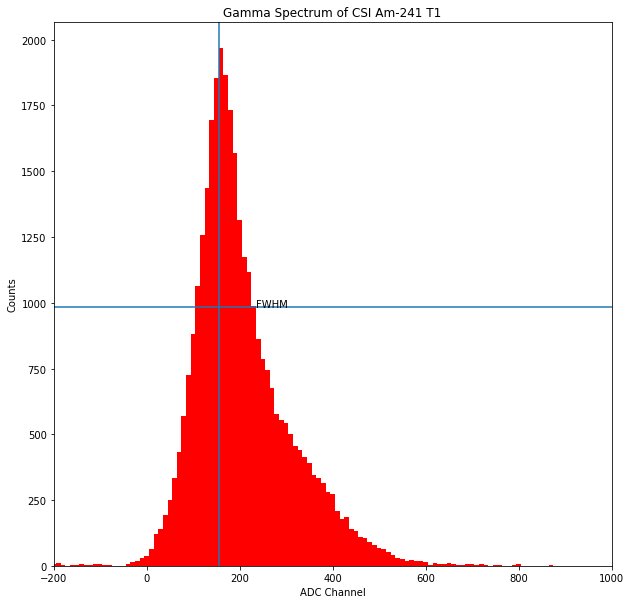

the FWHM of T1 is 120.0 and the max count occurs at ADC channel 155.0 corresponding to energy 59.54666666666666 keV


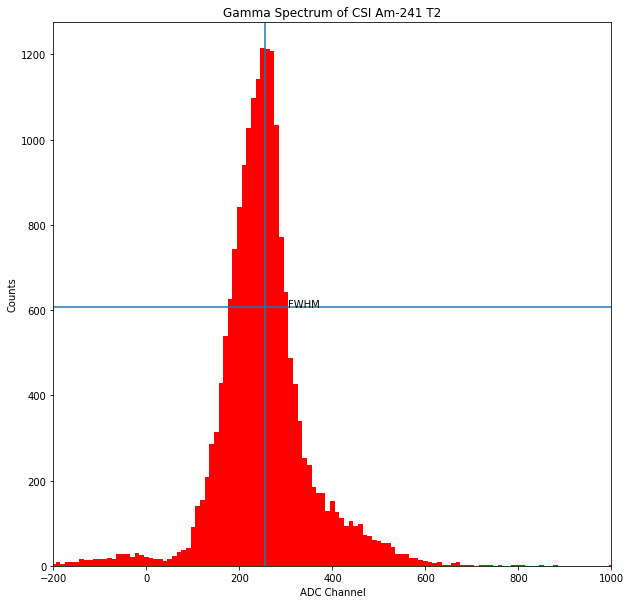

the FWHM of T2 is 120.0 and the max count occurs at ADC channel 255.0 corresponding to energy 59.54667 keV
The average conversion factor for CSI for Am is 0.30884419144001685 from tests 1 and 2 yielded 0.38417204301075264 and 0.23351633986928103
The resolution from T1 and T2 are 77.41935% and 47.05882% Where the average is 62.23909%


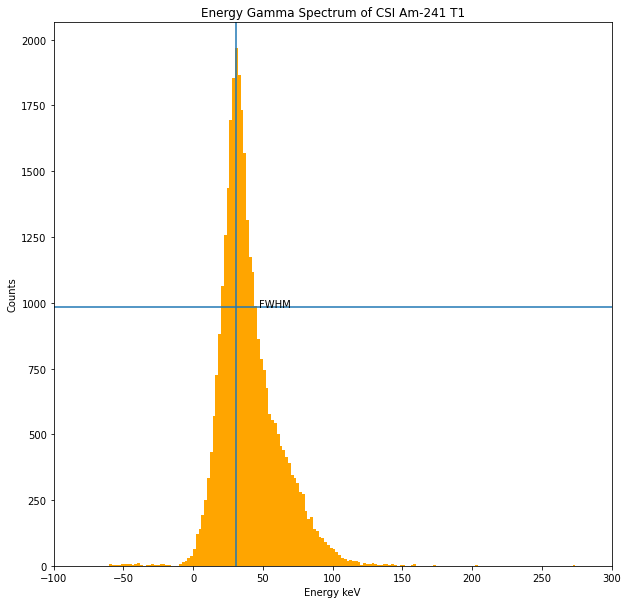

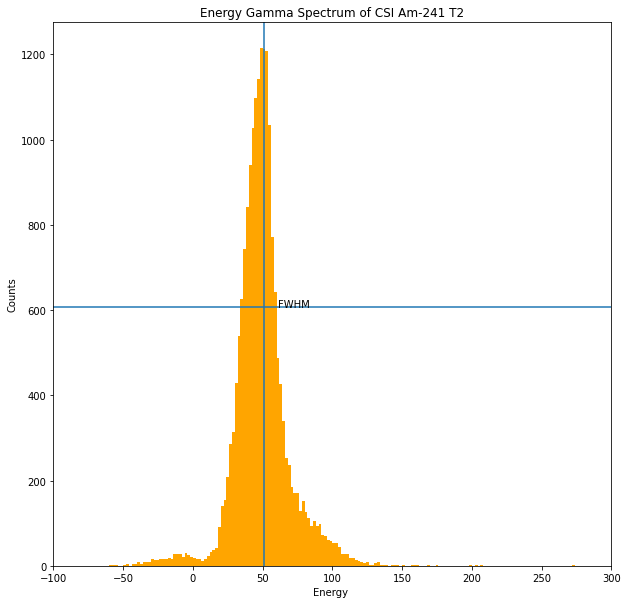

In [ ]:
#CSI
#Am241
#Counts vs ADC
#ADC vs Energy - conversion factor
#Counts vs Energy
#Resolution vs Energy for the crystal - FWHM
#Main peak Energy Literature = 59.6keV, 59,54keV, 59.5keV
#CSI - cant see smaller peak 
Ave_Energy_Peak = (59.6+59.54+59.5)/3

CSI_Am = pd.read_excel('Am241-CSI-ADCvCounts-Th40-G30-2.0.xlsx', usecols = [1,2])
CSI_Am1 = pd.read_excel('Am241-CSI-ADCvCounts.xlsx', usecols = [1,2])

CSI_Am.drop([0])
CSI_Am1.drop([0])
print(CSI_Am1)
print(CSI_Am)

#turn the two columns of CSI_Am into one list 
List_Counts = CSI_Am['Counts - Charge distribution'].tolist()
Counts = []
for i in List_Counts:
  Counts.append(int(i))
List_ADC = CSI_Am['ADC Channels - Charge distribution.1'].tolist()
Histogram = []
for i in range(len(List_Counts)):
  Histogram.extend([List_ADC[i]]*Counts[i])

#Find the ADC Channel corresponding to max count value for CSI_Am
#Find the FWHM
max_Count = CSI_Am['Counts - Charge distribution'].max()
index_max_Count = CSI_Am['Counts - Charge distribution'].idxmax()
ADC_max_Count = CSI_Am.at[index_max_Count, 'ADC Channels - Charge distribution.1']
print(f'This is the max Count value: {max_Count} at {ADC_max_Count}')
FWHM = []
for i in range(len(List_ADC)):
  if List_Counts[i] >= max_Count/2:
    FWHM.append(List_ADC[i])
print(FWHM)
FWHM_min = FWHM[0]
FWHM_max = FWHM[-1]



#turn the two columns of CSI_Am1 into one list 
List_Counts1 = CSI_Am1['Counts - Charge distribution'].tolist()
Counts1 = []
for i in List_Counts1:
  Counts1.append(int(i))
List_ADC1 = CSI_Am1['ADC Channel - Charge distribution.1'].tolist()
Histogram1 = []
for i in range(len(List_Counts1)):
  Histogram1.extend([List_ADC1[i]]*Counts1[i])

#Find the ADC Channel corresponding to max count value for CSI_Am1
#Find the FWHM
max_Count1 = CSI_Am1['Counts - Charge distribution'].max()
index_max_Count1 = CSI_Am1['Counts - Charge distribution'].idxmax()
ADC_max_Count1 = CSI_Am1.at[index_max_Count, 'ADC Channel - Charge distribution.1']+100
print(f'This is the max Count value: {max_Count1} at {ADC_max_Count1}')
FWHM1= []
for i in range(len(List_ADC1)):
  if List_Counts1[i] >= max_Count1/2:
    FWHM1.append(List_ADC1[i])
print(FWHM1)
FWHM_min1 = FWHM1[0]
FWHM_max1 = FWHM1[-1]


Hist = pd.DataFrame({'Hist': Histogram})
Hist1 = pd.DataFrame({'Hist1': Histogram1})
print(Hist)
print(Hist.describe())
print(Hist1)
print(Hist1.describe())

#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist(Histogram, bins = range(-295, 4375, 10), color = 'r')
plt.xlim(-200, 1000)
plt.axvline(x = ADC_max_Count)
plt.axhline(y = 0.5*max_Count)
plt.title('Gamma Spectrum of CSI Am-241 T1')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_max+10, max_Count/2, 'FWHM' )
plt.show()
print(f'the FWHM of T1 is {FWHM_max-FWHM_min} and the max count occurs at ADC channel {ADC_max_Count} corresponding to energy {Ave_Energy_Peak} keV')

#Plot graph of Counts vs ADC channels for Test 2
plt.figure(figsize = (10,10))
plt.hist(Histogram1, bins = range(-295, 4375, 10), color = 'r')
plt.xlim(-200, 1000)
plt.axvline(x = ADC_max_Count1)
plt.axhline(y = 0.5*max_Count1)
plt.title('Gamma Spectrum of CSI Am-241 T2')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_max1+10, max_Count1/2, 'FWHM' )
plt.show()
print(f'the FWHM of T2 is {FWHM_max1-FWHM_min1} and the max count occurs at ADC channel {round(ADC_max_Count1, 5)} corresponding to energy {round(Ave_Energy_Peak, 5)} keV')

#Conversion Factors
Con = Ave_Energy_Peak/ADC_max_Count
Con1 = Ave_Energy_Peak/ADC_max_Count1

#Average Conversion Factor
Ave_Con = (Con+Con1)/2
print(f'The average conversion factor for CSI for Am is {Ave_Con} from tests 1 and 2 yielded {Con} and {Con1}')
#The Resolution ER = FWHM_peak/E_peak *100%
ER = (FWHM_max - FWHM_min)/Ave_Energy_Peak * 100 *Con
ER1 = (FWHM_max1 - FWHM_min1)/Ave_Energy_Peak * 100 *Con1
Ave_ER = (ER+ER1)/2
print(f'The resolution from T1 and T2 are {round(ER, 5)}% and {round(ER1, 5)}% Where the average is {round(Ave_ER, 5)}%')

#Plot Energy vs Counts
#Conversion Factor 0.2
#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist([i*0.2 for i in Histogram], bins = range(-100,300,2), color = 'orange')
plt.axvline(x = ADC_max_Count*0.2)
plt.axhline(y = 0.5*max_Count)
plt.title('Energy Gamma Spectrum of CSI Am-241 T1')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.xlim([-100, 300])
plt.text((FWHM_max+10)*0.2, max_Count/2, 'FWHM' )
plt.show()

#Plot graph of Counts vs ADC channels for Test 2
plt.figure(figsize = (10,10))
plt.hist([i*0.2 for i in Histogram1], bins = range(-100,300,2), color = 'orange')
plt.axvline(x = ADC_max_Count1*0.2)
plt.axhline(y = 0.5*max_Count1)
plt.title('Energy Gamma Spectrum of CSI Am-241 T2')
plt.xlabel('Energy ')
plt.ylabel('Counts')
plt.xlim([-100, 300])
plt.text((FWHM_max1+10)*0.2, max_Count1/2, 'FWHM' )
plt.show()

      ADC Channel - Charge distribution  Counts - Charge distribution
0                                  -495                             2
1                                  -485                             1
2                                  -475                             1
3                                  -465                             1
4                                  -455                             1
...                                 ...                           ...
1995                              19455                             0
1996                              19465                             0
1997                              19475                             0
1998                              19485                             0
1999                              19495                             0

[2000 rows x 2 columns]
      ADC Channel - Charge distribution  Counts - Charge distribution
0                                  -495                          

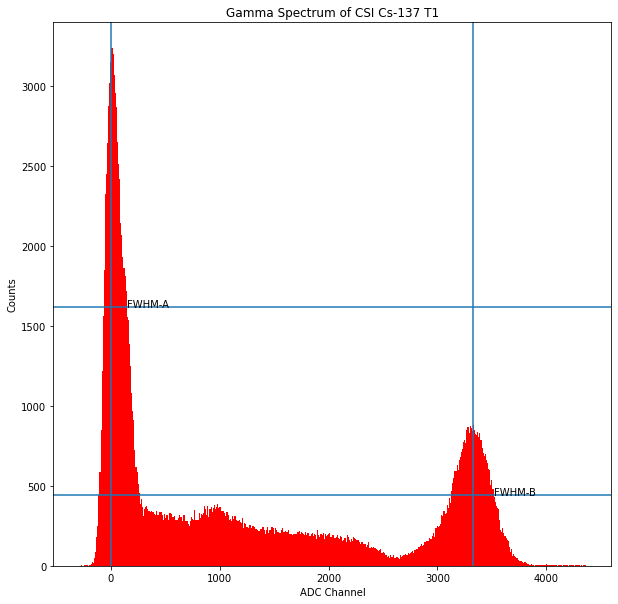

the FWHM of T1 is 200 and 380 and the max count occurs at ADC channel 5 and 3325 corresponding to energy 32.0 and 661.85 keV respectively


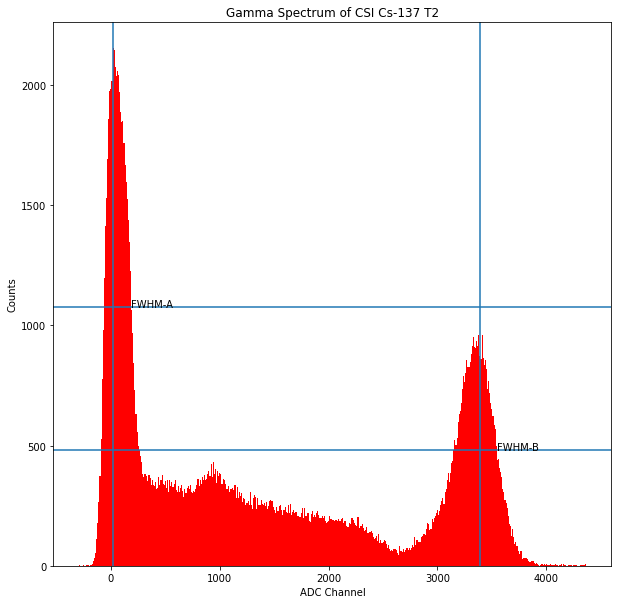

the FWHM of T2 is 240 and 390 and the max count occurs at ADC channel 15 and 3390 corresponding to energy 32.0 and 661.85 keV respectively
the conversion factors for first peak for T1 and T2 are 6.4 and 2.1333333333333333 as for the main peak 0.19905263157894737 and 0.19523598820059 respectively
The average conversion factor for CSI for Cs is 2.2319054882782177 from ave first and ave main peaks of 4.266666666666667 and 0.19714430988976867 respectively
The resolution from T1 and T2 for the first peak are 4000.0% and 1600.0% Where the average is 2800.0%
The resolution from T1 and T2 for the main peak are 11.42857% and 11.50442% Where the average is 11.4665%
The resolution of the crystal from T1 and T2 are 2005.71429% and 805.75221% Where the total average is 1405.73325%


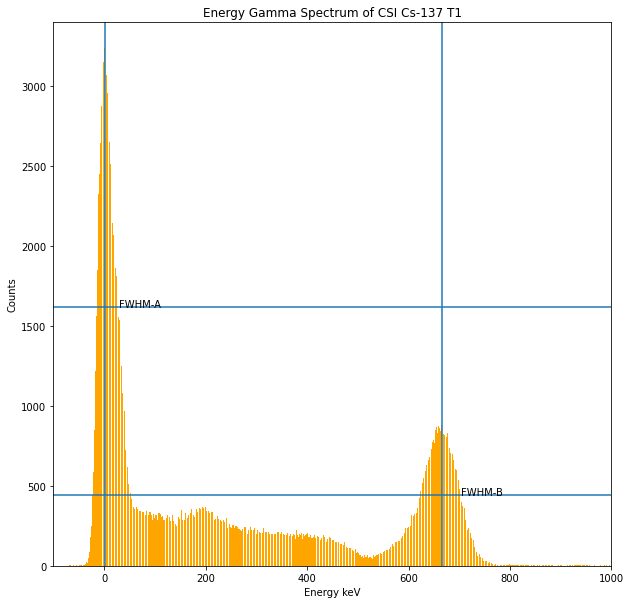

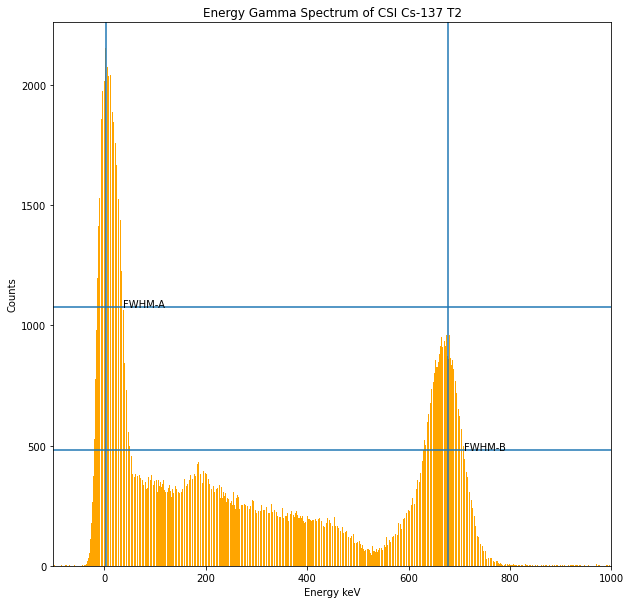

In [ ]:
#CSI
#Cs137
#Counts vs ADC
#ADC vs Energy - conversion factor
#Counts vs Energy
#Resolution vs Energy for the crystal - FWHM
#First peak Literature = 32keV
#Compton scatter peak = 200keV, 180keV, 215keV
#Main peak = 662keV, 661.7keV
Ave_First_Energy_Peak = (32+32)/2
Ave_Compton_Energy_Peak = (200+180+215)/3
Ave_Main_Energy_Peak = (662+661.7)/2


CSI_Cs = pd.read_excel('Cs137-ADCvCounts-CSI.xlsx', usecols = [0,1])
CSI_Cs1 = pd.read_excel('Cs137-CSI-ADCvCounts-Th45,G40.xlsx', usecols = [0,1])

CSI_Cs.drop([0])
CSI_Cs1.drop([0])
print(CSI_Cs1)
print(CSI_Cs)

#turn the two columns of CSI_Cs into one list 
List_Counts = CSI_Cs['Counts - Charge distribution'].tolist()
Counts = []
for i in List_Counts:
  Counts.append(int(i))
List_ADC = CSI_Cs['ADC Channel - Charge distribution'].tolist()
Histogram = []
for i in range(len(List_Counts)):
  Histogram.extend([List_ADC[i]]*Counts[i])

##Find the ADC Channel corresponding to max count value for CSI_Cs
#Find the FWHM
B = List_Counts[201:-1]
A = List_ADC[201:-1]
max_CountB = max(B)
index_max_CountB = CSI_Cs.loc[CSI_Cs['Counts - Charge distribution'] == max_CountB].index.values
ADC_max_CountB = CSI_Cs.at[int(index_max_CountB), 'ADC Channel - Charge distribution']
FWHMB = []
for i in range(len(B)):
  if B[i] >= max_CountB/2:
    FWHMB.append(A[i])
print(FWHMB)
FWHM_minB = FWHMB[0]
FWHM_maxB = FWHMB[-1]

max_Count = CSI_Cs['Counts - Charge distribution'].max()
index_max_Count = CSI_Cs['Counts - Charge distribution'].idxmax()
ADC_max_Count = CSI_Cs.at[index_max_Count, 'ADC Channel - Charge distribution']
FWHM = []
for i in range(len(List_ADC)):
  if List_Counts[i] >= max_Count/2:
    FWHM.append(List_ADC[i])
print(FWHM)
FWHM_min = FWHM[0]
FWHM_max = FWHM[-1]
print(f'Thie max count values are {max_CountB} and {max_Count}')

#turn the two columns of CSI_Cs1 into one list 
List_Counts1 = CSI_Cs1['Counts - Charge distribution'].tolist()
Counts1 = []
for i in List_Counts1:
  Counts1.append(int(i))
List_ADC1 = CSI_Cs1['ADC Channel - Charge distribution'].tolist()
Histogram1 = []
for i in range(len(List_Counts1)):
  Histogram1.extend([List_ADC1[i]]*Counts1[i])

#Find the ADC Channel corresponding to max count value for CSI_Cs1
#Find the FWHM
C = List_Counts1[201:-1]
D = List_ADC1[201:-1]
max_CountC = max(C)
print(f'this is max count T2 peak 2 {max(C)}')
index_max_CountC = CSI_Cs.loc[CSI_Cs['Counts - Charge distribution'] == max_CountC].index.values
#ADC_max_CountC = CSI_Cs.at[int(index_max_CountC), 'ADC Channel - Charge distribution']
FWHMC = []
for i in range(len(C)):
  if C[i] >= max_CountC/2:
    FWHMC.append(D[i])
print(f'this is FWHM 2nd peak {FWHMC}')
FWHM_minC = FWHMC[0]
FWHM_maxC = FWHMC[-1]

max_Count1 = CSI_Cs1['Counts - Charge distribution'].max()
print(f'This is the max Count value: {max_Count1}')
index_max_Count1 = CSI_Cs1['Counts - Charge distribution'].idxmax()
ADC_max_Count1 = CSI_Cs1.at[index_max_Count, 'ADC Channel - Charge distribution']+10
FWHM1= []
for i in range(len(List_ADC1)):
  if List_Counts1[i] >= max_Count1/2:
    FWHM1.append(List_ADC1[i])
print(FWHM1)
FWHM_min1 = FWHM1[0]
FWHM_max1 = FWHM1[-1]


Hist = pd.DataFrame({'Hist': Histogram})
Hist1 = pd.DataFrame({'Hist1': Histogram1})
print(Hist)
print(Hist.describe())
print(Hist1)
print(Hist1.describe())

#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist(Histogram, bins = range(-295, 4375, 10), color = 'r')
plt.axvline(x = ADC_max_Count)
plt.axhline(y = 0.5*max_Count)
plt.axvline(x = ADC_max_CountB)
plt.axhline(y = 0.5*max_CountB)
plt.title('Gamma Spectrum of CSI Cs-137 T1')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_max+10, max_Count/2, 'FWHM-A' )
plt.text(FWHM_maxB+10, max_CountB/2, 'FWHM-B' )
plt.show()
print(f'the FWHM of T1 is {FWHM_max-FWHM_min} and {FWHM_maxB-FWHM_minB} and the max count occurs at ADC channel {round(ADC_max_Count, 5)} and {round(ADC_max_CountB, 5)} corresponding to energy {round(Ave_First_Energy_Peak, 5)} and {round(Ave_Main_Energy_Peak, 5)} keV respectively')

#Plot graph of Counts vs ADC channels for Test 2
plt.figure(figsize = (10,10))
plt.hist(Histogram1, bins = range(-295, 4375, 10), color = 'r')
plt.axvline(x = ADC_max_Count1)
plt.axhline(y = 0.5*max_Count1)
plt.axvline(x = 3390)
plt.axhline(y = 0.5*max_CountC)
plt.title('Gamma Spectrum of CSI Cs-137 T2')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_max1+10, max_Count1/2, 'FWHM-A' )
plt.text(FWHM_maxC+10, max_CountC/2, 'FWHM-B' )
plt.show()
print(f'the FWHM of T2 is {FWHM_max1-FWHM_min1} and {FWHM_maxC-FWHM_minC} and the max count occurs at ADC channel {round(ADC_max_Count1, 5)} and {3390} corresponding to energy {round(Ave_First_Energy_Peak, 5)} and {round(Ave_Main_Energy_Peak, 5)} keV respectively')

#Conversion Factors
#First
ConF = Ave_First_Energy_Peak/ADC_max_Count 
ConF1 = Ave_First_Energy_Peak/ADC_max_Count1 

#Main
ConM = Ave_Main_Energy_Peak/ADC_max_CountB 
ConM1 = Ave_Main_Energy_Peak/3390 

#Average Conversion Factor
#First
Ave_ConF = (ConF+ConF1)/2
#Main
Ave_ConM = (ConM+ConM1)/2
#overall
Ave_Con = (ConF+ConF1+ConM+ConM1)/4
print(f'the conversion factors for first peak for T1 and T2 are {ConF} and {ConF1} as for the main peak {ConM} and {ConM1} respectively')
print(f'The average conversion factor for CSI for Cs is {Ave_Con} from ave first and ave main peaks of {Ave_ConF} and {Ave_ConM} respectively')
#The Resolution ER = FWHM_peak/E_peak *100%
#First
ERF = (FWHM_max - FWHM_min)/Ave_First_Energy_Peak * 100*ConF
ERF1 = (FWHM_max1 - FWHM_min1)/Ave_First_Energy_Peak * 100*ConF1
Ave_ERF = (ERF+ERF1)/2
print(f'The resolution from T1 and T2 for the first peak are {round(ERF, 5)}% and {round(ERF1, 5)}% Where the average is {round(Ave_ERF, 5)}%')


#Main
ERM = (FWHM_maxB - FWHM_minB)/Ave_Main_Energy_Peak * 100*ConM
ERM1 = (FWHM_maxC - FWHM_minC)/Ave_Main_Energy_Peak * 100*ConM1
Ave_ERM = (ERM+ERM1)/2
print(f'The resolution from T1 and T2 for the main peak are {round(ERM, 5)}% and {round(ERM1, 5)}% Where the average is {round(Ave_ERM, 5)}%')

#Overall
Ave_ER_T1 = (ERF+ERM)/2
Ave_ER_T2 = (ERF1+ERM1)/2
Ave_ER = (Ave_ERF + Ave_ERM)/2
print(f'The resolution of the crystal from T1 and T2 are {round(Ave_ER_T1, 5)}% and {round(Ave_ER_T2, 5)}% Where the total average is {round(Ave_ER, 5)}%')

#Plot Energy vs Counts
#Conversion Factor is 0.2
#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist([i*0.2 for i in Histogram], bins = 1000, color = 'orange')
plt.axvline(x = ADC_max_Count*0.2)
plt.axhline(y = 0.5*max_Count)
plt.axvline(x = ADC_max_CountB*0.2)
plt.axhline(y = 0.5*max_CountB)
plt.title('Energy Gamma Spectrum of CSI Cs-137 T1')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.xlim(-100, 1000)
plt.text((FWHM_max+10)*0.2, max_Count/2, 'FWHM-A' )
plt.text((FWHM_maxB+10)*0.2, max_CountB/2, 'FWHM-B' )
plt.show()

#Plot graph of Counts vs ADC channels for Test 2
plt.figure(figsize = (10,10))
plt.hist([i*0.2 for i in Histogram1], bins = 1000, color = 'orange')
plt.axvline(x = ADC_max_Count1*0.2)
plt.axhline(y = 0.5*max_Count1)
plt.axvline(x = 3390*0.2)
plt.axhline(y = 0.5*max_CountC)
plt.title('Energy Gamma Spectrum of CSI Cs-137 T2')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.xlim(-100, 1000)
plt.text((FWHM_max1+10)*0.2, max_Count1/2, 'FWHM-A' )
plt.text((FWHM_maxC+10)*0.2, max_CountC/2, 'FWHM-B' )
plt.show()

      ADC Channel - Charge distribution  Counts - Charge distribution
0                                -495.0                           1.0
1                                -485.0                           1.0
2                                -475.0                           0.0
3                                -465.0                           1.0
4                                -455.0                           0.0
...                                 ...                           ...
1045                             9955.0                           0.0
1046                             9965.0                           0.0
1047                             9975.0                           0.0
1048                             9985.0                           0.0
1049                             9995.0                           0.0

[1050 rows x 2 columns]
The max counts for peaks 1,2 and 3 are 139.0, 82.0 and 63.0 at ADC channels 1025.0, 5525.0 and 6335.0 
[535.0, 565.0, 575.0, 585.0, 595

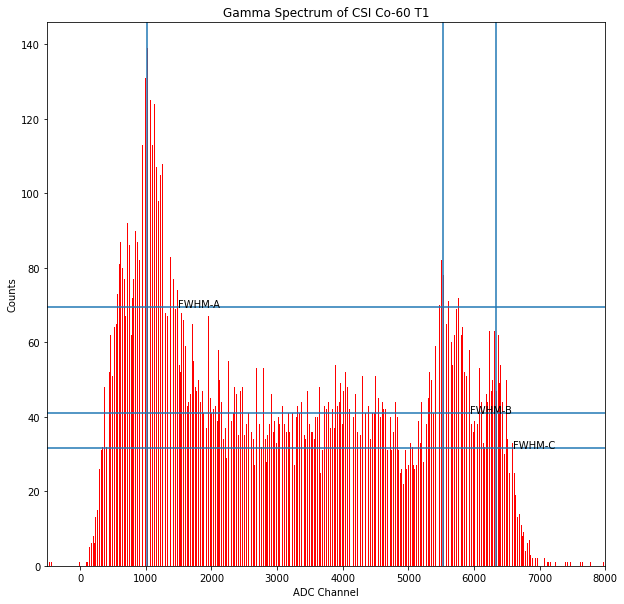

the FWHM of the three peaks are 950.0, 740.0 and 570.0 where the max count occurs at ADC channel 1025.0, 5525.0 and 6335.0  corresponding to energy 218.49, 1173.6 and 1332.5 keV respectively
The average conversion factor for CSI for Co is 0.2119722165250166 from compton, peaks 1 and 2 are 0.2131609756097561, 0.21241628959276015 and 0.21033938437253355 respectively
The resolution of the crystal at each peak are 92.68293%,  13.39367% and 8.99763% Where the total average is 38.35807%


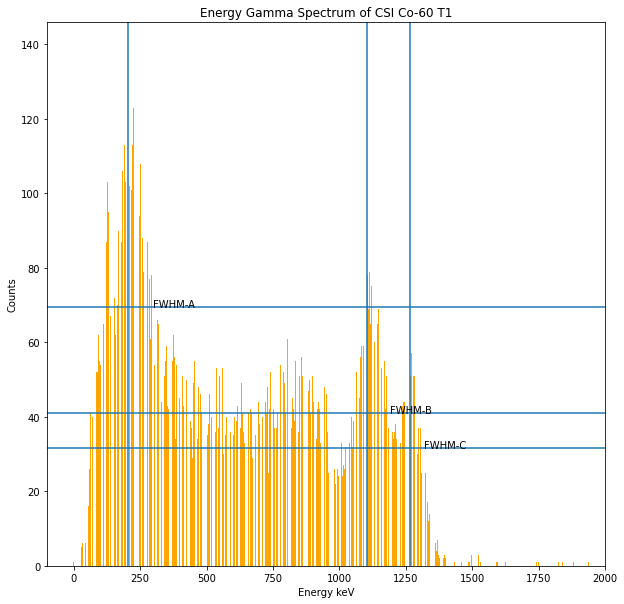

In [ ]:
##MUST EDIT THIS ONE TO GET FULL SPECTRUM##
#CSI
#Co60
#Counts vs ADC
#ADC vs Energy - conversion factor
#Counts vs Energy
#Resolution vs Energy - FWHM

#Energy levels Literature
#Energy of Compton Efect - 209.8keV, 227.18keV 
#Energy of First Peak - 1173.2keV, 1174keV 
#Energy of Second Peak - 1332.5keV, 
Ave_Energy_Compton = (209.8+227.18)/2
Ave_Energy_Peak1 = (1173.2+1174)/2
Ave_Energy_Peak2 = 1332.5

CSI_Co = pd.read_excel('Co60-CSI-ADCvCounts-G30.xlsx', usecols = [0,1])

CSI_Co.drop([0])
print(CSI_Co)

#turn the two columns of CSI_Co into one list 
List_Counts = CSI_Co['Counts - Charge distribution'].tolist()
Counts = []
for i in List_Counts:
  Counts.append(int(i))
List_ADC = CSI_Co['ADC Channel - Charge distribution'].tolist()
Histogram = []
for i in range(len(List_Counts)):
  Histogram.extend([List_ADC[i]]*Counts[i])

##Find the ADC Channel corresponding to max count value for CSI_Co
#Find the FWHM

A = List_Counts[:400]
B = List_ADC[:400]
C = List_Counts[401:650]
D = List_ADC[401:650]
E = List_Counts[651:-1]
F = List_ADC[651:-1]
G = List_Counts[540:650]
H = List_ADC[540:650]
max_CountA = max(A)
max_CountC = max(C)
max_CountE = max(E)

index_max_CountA = CSI_Co.loc[CSI_Co['Counts - Charge distribution'] == max_CountA].index.values
ADC_max_CountA = CSI_Co.at[int(index_max_CountA), 'ADC Channel - Charge distribution']
index_max_CountC = CSI_Co.loc[CSI_Co['Counts - Charge distribution'] == max_CountC].index.values
ADC_max_CountC = CSI_Co.at[602, 'ADC Channel - Charge distribution']
index_max_CountE = CSI_Co.loc[CSI_Co['Counts - Charge distribution'] == max_CountA].index.values
ADC_max_CountE = CSI_Co.at[683, 'ADC Channel - Charge distribution']
print(f'The max counts for peaks 1,2 and 3 are {max_CountA}, {max_CountC} and {max_CountE} at ADC channels {ADC_max_CountA}, {ADC_max_CountC} and {ADC_max_CountE} ')
FWHMA = []
for i in range(len(A)):
  if A[i] >= max_CountA/2:
    FWHMA.append(B[i])
print(FWHMA)
FWHM_minA = FWHMA[0]
FWHM_maxA = FWHMA[-1]

FWHMC = []
for i in range(len(G)):
  if G[i] >= max_CountC/2:
    FWHMC.append(H[i])
print(FWHMC)
FWHM_minC = FWHMC[0]
FWHM_maxC = FWHMC[-1]

FWHME = []
for i in range(len(E)):
  if E[i] >= max_CountE/2:
    FWHME.append(F[i])
print(FWHME)
FWHM_minE = FWHME[0]
FWHM_maxE = FWHME[-1]


Hist = pd.DataFrame({'Hist': Histogram})
print(Hist)
print(Hist.describe())

#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist(Histogram, bins = 2000, color = 'r')
plt.axvline(x = ADC_max_CountA)
plt.axhline(y = 0.5*max_CountA)
plt.axvline(x = ADC_max_CountC)
plt.axhline(y = 0.5*max_CountC)
plt.axvline(x = ADC_max_CountE)
plt.axhline(y = 0.5*max_CountE)
plt.title('Gamma Spectrum of CSI Co-60 T1')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.xlim(-500, 8000)
plt.text(FWHM_maxA+10, max_CountA/2, 'FWHM-A' )
plt.text(FWHM_maxC+10, max_CountC/2, 'FWHM-B' )
plt.text(FWHM_maxE+10, max_CountE/2, 'FWHM-C' )
plt.show()
print(f'the FWHM of the three peaks are {FWHM_maxA-FWHM_minA}, {FWHM_maxC-FWHM_minC} and {FWHM_maxE-FWHM_minE} where the max count occurs at ADC channel {round(ADC_max_CountA, 5)}, {round(ADC_max_CountC, 5)} and {round(ADC_max_CountE, 5)}  corresponding to energy {round(Ave_Energy_Compton, 5)}, {round(Ave_Energy_Peak1, 5)} and {round(Ave_Energy_Peak2, 5)} keV respectively')

#Conversion Factors
#Compton
ConC = Ave_Energy_Compton/ADC_max_CountA 
#Peak 1
ConP1 = Ave_Energy_Peak1/ADC_max_CountC 

#Peak 2 
ConP2 = Ave_Energy_Peak2/ADC_max_CountE

#Average Conversion Factor
Ave_Con = (ConC+ConP1+ConP2)/3
print(f'The average conversion factor for CSI for Co is {Ave_Con} from compton, peaks 1 and 2 are {ConC}, {ConP1} and {ConP2} respectively')
#The Resolution ER = FWHM_peak/E_peak *100%
#Compton
ERC = (FWHM_maxA - FWHM_minA)/Ave_Energy_Compton * 100*ConC

#Peak 1
ERP1 = (FWHM_maxC - FWHM_minC)/Ave_Energy_Peak1 * 100*ConP1

#Peak 2
ERP2 = (FWHM_maxE - FWHM_minE)/Ave_Energy_Peak2 * 100*ConP2

#Overall
Ave_ER = (ERC + ERP1 + ERP2)/3
print(f'The resolution of the crystal at each peak are {round(ERC, 5)}%,  {round(ERP1, 5)}% and {round(ERP2, 5)}% Where the total average is {round(Ave_ER, 5)}%')

#Plot Energy vs Counts
#Conversion factor is 0.2
#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist([i*0.2 for i in Histogram], bins = 2000, color = 'orange')
plt.axvline(x = ADC_max_CountA*0.2)
plt.axhline(y = 0.5*max_CountA)
plt.axvline(x = ADC_max_CountC*0.2)
plt.axhline(y = 0.5*max_CountC)
plt.axvline(x = ADC_max_CountE*0.2)
plt.axhline(y = 0.5*max_CountE)
plt.title('Energy Gamma Spectrum of CSI Co-60 T1')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.xlim(-100, 2000)
plt.text((FWHM_maxA+10)*0.2, max_CountA/2, 'FWHM-A' )
plt.text((FWHM_maxC+10)*0.2, max_CountC/2, 'FWHM-B' )
plt.text((FWHM_maxE+10)*0.2, max_CountE/2, 'FWHM-C' )
plt.show()

      ADC Channels - Charge distribution  Counts - Charge distribution
0                                 -495.0                           4.0
1                                 -485.0                           2.0
2                                 -475.0                           2.0
3                                 -465.0                           0.0
4                                 -455.0                           0.0
...                                  ...                           ...
1995                             19455.0                           0.0
1996                             19465.0                           0.0
1997                             19475.0                           0.0
1998                             19485.0                           0.0
1999                             19495.0                           0.0

[2000 rows x 2 columns]
[345.0, 355.0, 365.0, 375.0, 385.0, 395.0, 405.0, 415.0, 425.0, 435.0, 445.0, 455.0, 465.0, 475.0, 485.0, 495.0, 505.0, 515

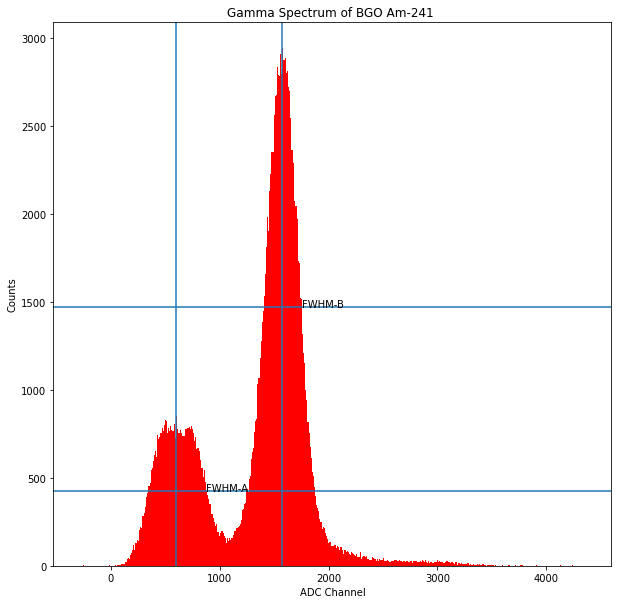

the FWHM of the two peaks are 520.0 and 340.0 respectively, these correspond to the ADC channels 595.0 and 1575.0 corresponding to energies 26.328266666666668 and 59.54666666666666 keV
The average conversion factor for BGO for Am is 0.04102829754123871 from the peaks 1 and 2: 0.04424918767507003 and 0.0378074074074074 respectively
The resolution from Peak1 and Peak2 are 87.39496% and 21.5873% Where the average is 54.49113%


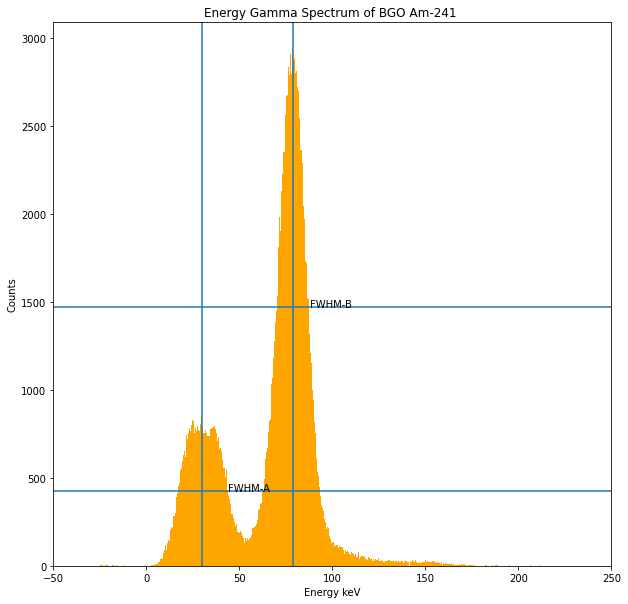

In [ ]:
#BGO
#Am241
#Counts vs ADC
#ADC vs Energy - conversion factor
#Counts vs Energy
#Resolution vs Energy - FWHM
#Main peak Energy Literature = 59.6keV, 59,54keV, 59.5keV
#First smaller peak = 26.34keV, 26.3keV, 26.3448keV 
Ave_Energy_Peak1 = (26.34+26.3+26.3448)/3
Ave_Energy_Peak2 = (59.6+59.54+59.5)/3

BGO_Am = pd.read_excel('Am241-BGO-ADCvCount-G30-Th35.xlsx', usecols = [0,1])

BGO_Am.drop([0])
print(BGO_Am)

#turn the two columns of BGO_Am into one list 
List_Counts = BGO_Am['Counts - Charge distribution'].tolist()
Counts = []
for i in List_Counts:
  Counts.append(int(i))
List_ADC = BGO_Am['ADC Channels - Charge distribution'].tolist()
Histogram = []
for i in range(len(List_Counts)):
  Histogram.extend([List_ADC[i]]*Counts[i])

#Find the ADC Channel corresponding to max count value for BGO_Am
#Find the FWHM
A = List_Counts[:150]
B = List_Counts[151:-1]
C = List_ADC[:150]
D = List_ADC[151:-1]
max_CountA = max(A)
index_max_CountA = BGO_Am.loc[BGO_Am['Counts - Charge distribution'] == max_CountA].index.values
ADC_max_CountA = BGO_Am.at[int(index_max_CountA), 'ADC Channels - Charge distribution']
FWHMA = []
for i in range(len(A)):
  if A[i] >= max_CountA/2:
    FWHMA.append(C[i])
print(FWHMA)
FWHM_minA = FWHMA[0]
FWHM_maxA = FWHMA[-1]

max_CountB = max(B)
index_max_CountB = BGO_Am.loc[BGO_Am['Counts - Charge distribution'] == max_CountB].index.values
ADC_max_CountB = BGO_Am.at[int(index_max_CountB), 'ADC Channels - Charge distribution']
FWHMB = []
for i in range(len(A)):
  if B[i] >= max_CountB/2:
    FWHMB.append(D[i])
print(FWHMB)
FWHM_minB = FWHMB[0]
FWHM_maxB = FWHMB[-1]




Hist = pd.DataFrame({'Hist': Histogram})
print(Hist)
print(Hist.describe())


#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist(Histogram, bins = range(-295, 4375, 10), color = 'r')
plt.axvline(x = ADC_max_CountA)
plt.axhline(y = 0.5*max_CountA)
plt.axvline(x = ADC_max_CountB)
plt.axhline(y = 0.5*max_CountB)
plt.title('Gamma Spectrum of BGO Am-241 ')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_maxA+10, max_CountA/2, 'FWHM-A' )
plt.text(FWHM_maxB+10, max_CountB/2, 'FWHM-B' )
plt.show()
print(f'the FWHM of the two peaks are {FWHM_maxA-FWHM_minA} and {FWHM_maxB-FWHM_minB} respectively, these correspond to the ADC channels {ADC_max_CountA} and {ADC_max_CountB} corresponding to energies {Ave_Energy_Peak1} and {Ave_Energy_Peak2} keV')

#Conversion Factors
Con1 = Ave_Energy_Peak1/ADC_max_CountA
Con2 = Ave_Energy_Peak2/ADC_max_CountB

#Average Conversion Factor
Ave_Con = (Con1+Con2)/2
print(f'The average conversion factor for BGO for Am is {Ave_Con} from the peaks 1 and 2: {Con1} and {Con2} respectively')
#The Resolution ER = FWHM_peak/E_peak *100%
ER1 = (FWHM_maxA - FWHM_minA)/Ave_Energy_Peak1 * 100 *Con1
ER2 = (FWHM_maxB - FWHM_minB)/Ave_Energy_Peak2 * 100 *Con2
Ave_ER = (ER1+ER2)/2
print(f'The resolution from Peak1 and Peak2 are {round(ER1, 5)}% and {round(ER2, 5)}% Where the average is {round(Ave_ER, 5)}%')

#Plot Enery vs Counts
#Best Conversion Factor C = 0.05

#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist([i*0.05 for i in Histogram], bins = 1000, color = 'orange')
plt.axvline(x = ADC_max_CountA*0.05)
plt.axhline(y = 0.5*max_CountA)
plt.axvline(x = ADC_max_CountB*0.05)
plt.axhline(y = 0.5*max_CountB)
plt.title('Energy Gamma Spectrum of BGO Am-241 ')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.xlim([-50, 250])
plt.text((FWHM_maxA+10)*0.05, max_CountA/2, 'FWHM-A' )
plt.text((FWHM_maxB+10)*0.05, max_CountB/2, 'FWHM-B' )
plt.show()

      ADC Channels - Charge distribution  Counts - Charge distribution
0                                   -495                             0
1                                   -485                             0
2                                   -475                             0
3                                   -465                             0
4                                   -455                             0
...                                  ...                           ...
1995                               19455                             0
1996                               19465                             0
1997                               19475                             0
1998                               19485                             0
1999                               19495                             0

[2000 rows x 2 columns]
      ADC Channels - Charge distribution  Counts - Charge distribution
0                                 -495.0            

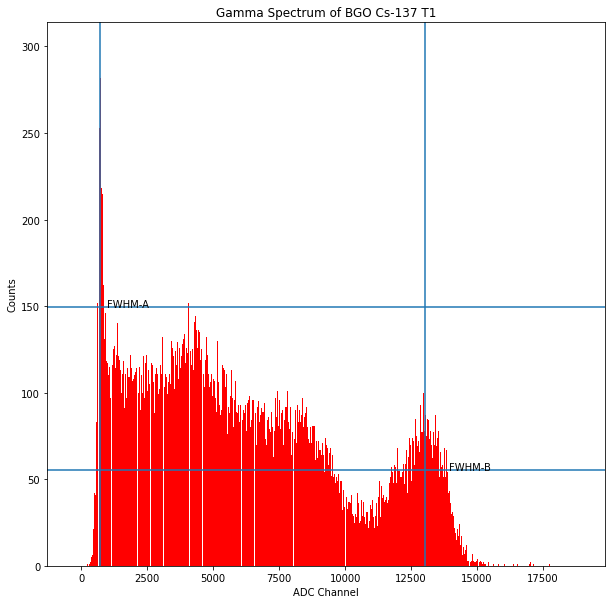

the FWHM of T1 is 360.0 and 2180.0 channels and the max count occurs at ADC channel 715.0 and 13015.0 corresponding to energy 32.0  and 661.85 keV respectively


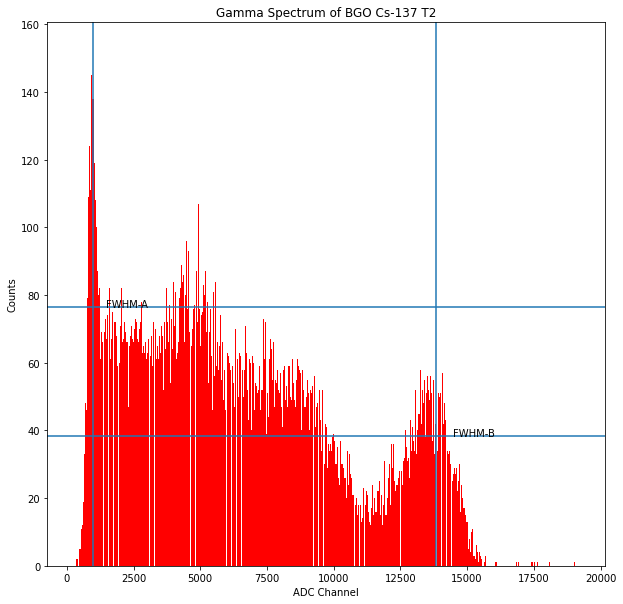

the FWHM of T2 is 720 and 2010.0 channels and the max count occurs at ADC channel 975 and 13825.0 corresponding to energy 32.0 and 661.85 keV respectively
The conversion factors from T1 and T2 for the first peak are 0.044755244755244755 and 0.03282051282051282 as for the main peak they are 0.05085286208221283 and 0.04787341772151899
The average conversion factor for BGO for Am is 0.04407550934487235 from the compton and main peaks being 0.03878787878787879 and 0.049363139901865916 respectively
The resolution from T1 and T2 for the first peak are 50.34965% and 73.84615% Where the average is 62.0979%
The resolution from T1 and T2 for main peak are 16.7499% and 14.53888% Where the average is 15.64439%
The resolution of the crystal from T1 and T2 are 33.54978% and 44.19252% Where the total average is 38.87115%


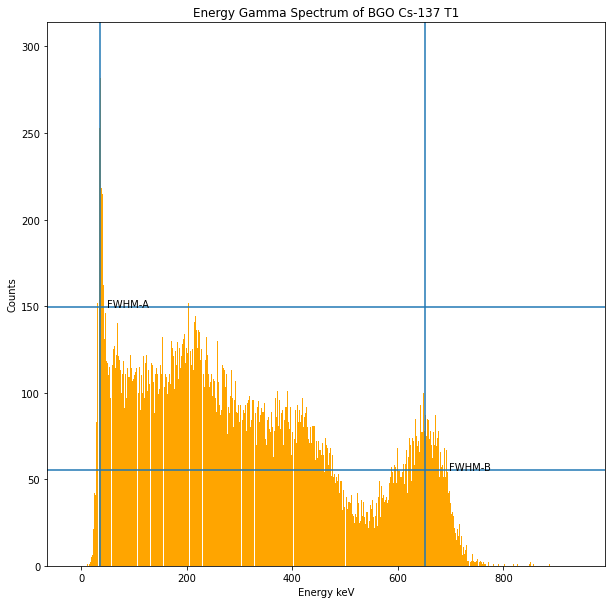

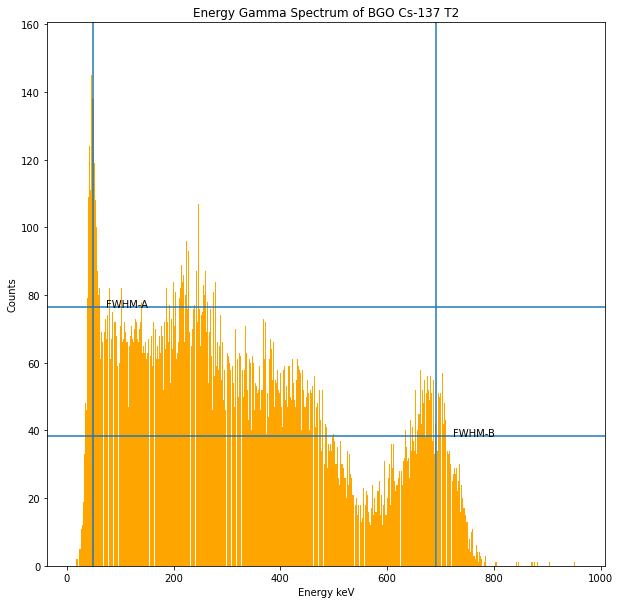

In [ ]:
#BGO
#Cs137
#Counts vs ADC
#ADC vs Energy - conversion factor
#Counts vs Energy
#Resolution vs Energy - FWHM
#First peak Literature = 32keV
#Compton scatter peak = 200keV, 180keV, 215keV
#Main peak = 662keV, 661.7keV
Ave_First_Energy_Peak = (32+32)/2
Ave_Compton_Energy_Peak = (200+180+215)/3
Ave_Main_Energy_Peak = (662+661.7)/2


BGO_Cs = pd.read_excel('Cs137-BGO-ADCvCounts-G25-Th35 - 2.0.xlsx', usecols = [0,1])
BGO_Cs1 = pd.read_excel('Cs137-BGO-ADCvCounts-G25-Th35.xlsx', usecols = [0,1])

BGO_Cs.drop([0])
BGO_Cs1.drop([0])
print(BGO_Cs1)
print(BGO_Cs)

#turn the two columns of BGO_Cs into one list 
List_Counts = BGO_Cs['Counts - Charge distribution'].tolist()
Counts = []
for i in List_Counts:
  Counts.append(int(i))
List_ADC = BGO_Cs['ADC Channels - Charge distribution'].tolist()
Histogram = []
for i in range(len(List_Counts)):
  Histogram.extend([List_ADC[i]]*Counts[i])

##Find the ADC Channel corresponding to max count value for BGO_Cs
#Find the FWHM
A = List_Counts[:200]
C = List_ADC[:200]
E = List_Counts[1151:-1]
F = List_ADC[1151:-1]
max_CountA = max(A)
index_max_CountA = BGO_Cs.loc[BGO_Cs['Counts - Charge distribution'] == max_CountA].index.values
ADC_max_CountA = BGO_Cs.at[int(index_max_CountA), 'ADC Channels - Charge distribution']
FWHMA = []
for i in range(len(A)):
  if A[i] >= max_CountA/2:
    FWHMA.append(C[i])
print(FWHMA)
FWHM_minA = FWHMA[0]
FWHM_maxA = FWHMA[-1]

max_CountE = max(E)
index_max_CountE = BGO_Cs.loc[BGO_Cs['Counts - Charge distribution'] == max_CountE].index.values
ADC_max_CountE = BGO_Cs.at[1350 , 'ADC Channels - Charge distribution']#int(index_max_CountE)
FWHME = []
for i in range(len(E)):
  if E[i] >= max_CountE/2:
    FWHME.append(F[i])
print(FWHME)
FWHM_minE = FWHME[0]
FWHM_maxE = FWHME[-1]

#turn the two columns of BGO_Cs1 into one list 
List_Counts1 = BGO_Cs1['Counts - Charge distribution'].tolist()
Counts1 = []
for i in List_Counts1:
  Counts1.append(int(i))
List_ADC1 = BGO_Cs1['ADC Channels - Charge distribution'].tolist()
Histogram1 = []
for i in range(len(List_Counts1)):
  Histogram1.extend([List_ADC1[i]]*Counts1[i])

#Find the ADC Channel corresponding to max count value for BGO_Cs1
#Find the FWHM
A1 = List_Counts1[:200]
C1 = List_ADC1[:200]
E1 = List_Counts1[1201:-1]
F1 = List_ADC[1201:-1]
max_CountA1 = max(A1)
index_max_CountA1 = BGO_Cs1.loc[BGO_Cs1['Counts - Charge distribution'] == max_CountA1].index.values
ADC_max_CountA1 = BGO_Cs1.at[int(index_max_CountA1), 'ADC Channels - Charge distribution']
FWHMA1 = []
for i in range(len(A1)):
  if A1[i] >= max_CountA1/2:
    FWHMA1.append(C1[i])
print(FWHMA1)
FWHM_minA1 = FWHMA1[0]
FWHM_maxA1 = FWHMA1[-1]

max_CountE1 = max(E1)
index_max_CountE1 = BGO_Cs.loc[BGO_Cs['Counts - Charge distribution'] == max_CountE1].index.values
ADC_max_CountE1 = BGO_Cs.at[1431, 'ADC Channels - Charge distribution']
FWHME1 = []
for i in range(len(E1)):
  if E1[i] >= max_CountE1/2:
    FWHME1.append(F1[i])
print(FWHME1)
FWHM_minE1 = FWHME1[0]
FWHM_maxE1 = FWHME1[-1]


Hist = pd.DataFrame({'Hist': Histogram})
Hist1 = pd.DataFrame({'Hist1': Histogram1})
print(Hist)
print(Hist.describe())
print(Hist1)
print(Hist1.describe())

#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist(Histogram, bins = 2000, color = 'r')
plt.axvline(x = ADC_max_CountA)
plt.axhline(y = 0.5*max_CountA)
plt.axvline(x = ADC_max_CountE)
plt.axhline(y = 0.5*max_CountE)
plt.title('Gamma Spectrum of BGO Cs-137 T1')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_maxA+10, max_CountA/2, 'FWHM-A' )
plt.text(FWHM_maxE+10, max_CountE/2, 'FWHM-B' )
plt.show()
print(f'the FWHM of T1 is {FWHM_maxA-FWHM_minA} and {FWHM_maxE-FWHM_minE} channels and the max count occurs at ADC channel {round(ADC_max_CountA, 5)} and {round(ADC_max_CountE, 5)} corresponding to energy {round(Ave_First_Energy_Peak, 5)}  and {round(Ave_Main_Energy_Peak, 5)} keV respectively')

#Plot graph of Counts vs ADC channels for Test 2
plt.figure(figsize = (10,10))
plt.hist(Histogram1, bins = 2000, color = 'r')
plt.axvline(x = ADC_max_CountA1)
plt.axhline(y = 0.5*max_CountA1)
plt.axvline(x = ADC_max_CountE1)
plt.axhline(y = 0.5*max_CountE1)
plt.title('Gamma Spectrum of BGO Cs-137 T2')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_maxA1+10, max_CountA1/2, 'FWHM-A' )
plt.text(FWHM_maxE1+10, max_CountE1/2, 'FWHM-B' )
plt.show()
print(f'the FWHM of T2 is {FWHM_maxA1-FWHM_minA1} and {FWHM_maxE1-FWHM_minE1} channels and the max count occurs at ADC channel {round(ADC_max_CountA1, 5)} and {round(ADC_max_CountE1, 5)} corresponding to energy {round(Ave_First_Energy_Peak, 5)} and {round(Ave_Main_Energy_Peak, 5)} keV respectively')

#Conversion Factors
#First
ConF = Ave_First_Energy_Peak/ADC_max_CountA 
ConF1 = Ave_First_Energy_Peak/ADC_max_CountA1 

#Main
ConM = Ave_Main_Energy_Peak/ADC_max_CountE 
ConM1 = Ave_Main_Energy_Peak/ADC_max_CountE1 
print(f'The conversion factors from T1 and T2 for the first peak are {ConF} and {ConF1} as for the main peak they are {ConM} and {ConM1}')
#Average Conversion Factor
#First 
Ave_ConF = (ConF+ConF1)/2
#Main
Ave_ConM = (ConM+ConM1)/2
#overall
Ave_Con = (ConF+ConF1+ConM+ConM1)/4
print(f'The average conversion factor for BGO for Am is {Ave_Con} from the compton and main peaks being {Ave_ConF} and {Ave_ConM} respectively')

#The Resolution ER = FWHM_peak/E_peak *100%
#First
ERF = (FWHM_maxA - FWHM_minA)/Ave_First_Energy_Peak * 100*ConF
ERF1 = (FWHM_maxA1 - FWHM_minA1)/Ave_First_Energy_Peak * 100*ConF1
Ave_ERF = (ERF+ERF1)/2
print(f'The resolution from T1 and T2 for the first peak are {round(ERF, 5)}% and {round(ERF1, 5)}% Where the average is {round(Ave_ERF, 5)}%')


#Main
ERM = (FWHM_maxE - FWHM_minE)/Ave_Main_Energy_Peak * 100*ConM
ERM1 = (FWHM_maxE1 - FWHM_minE1)/Ave_Main_Energy_Peak * 100*ConM1
Ave_ERM = (ERM+ERM1)/2
print(f'The resolution from T1 and T2 for main peak are {round(ERM, 5)}% and {round(ERM1, 5)}% Where the average is {round(Ave_ERM, 5)}%')

#Overall
Ave_ER_T1 = (ERF+ERM)/2
Ave_ER_T2 = (ERF1+ERM1)/2
Ave_ER = (Ave_ERF + Ave_ERM)/2
print(f'The resolution of the crystal from T1 and T2 are {round(Ave_ER_T1, 5)}% and {round(Ave_ER_T2, 5)}% Where the total average is {round(Ave_ER, 5)}%')

#Energy vs Counts
#Conversion factor of BGO = 0.05 pm 0.05
#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist([i*0.05 for i in Histogram], bins = 2000, color = 'orange')
plt.axvline(x = ADC_max_CountA*0.05)
plt.axhline(y = 0.5*max_CountA)
plt.axvline(x = ADC_max_CountE*0.05)
plt.axhline(y = 0.5*max_CountE)
plt.title('Energy Gamma Spectrum of BGO Cs-137 T1')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.text((FWHM_maxA+10)*0.05, max_CountA/2, 'FWHM-A' )
plt.text((FWHM_maxE+10)*0.05, max_CountE/2, 'FWHM-B' )
plt.show()

#Plot graph of Counts vs ADC channels for Test 2
plt.figure(figsize = (10,10))
plt.hist([i*0.05 for i in Histogram1], bins = 2000, color = 'orange')
plt.axvline(x = ADC_max_CountA1*0.05)
plt.axhline(y = 0.5*max_CountA1)
plt.axvline(x = ADC_max_CountE1*0.05)
plt.axhline(y = 0.5*max_CountE1)
plt.title('Energy Gamma Spectrum of BGO Cs-137 T2')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.text((FWHM_maxA1+10)*0.05, max_CountA1/2, 'FWHM-A' )
plt.text((FWHM_maxE1+10)*0.05, max_CountE1/2, 'FWHM-B' )
plt.show()

      ADC Channel - Charge distribution  Counts - Charge distribution
0                                 455.0                         110.0
1                                 465.0                         115.0
2                                 475.0                         144.0
3                                 485.0                         130.0
4                                 495.0                         124.0
...                                 ...                           ...
1795                            18795.0                         111.0
1796                            18815.0                         102.0
1797                            18855.0                         107.0
1798                            18915.0                         108.0
1799                            19195.0                         102.0

[1800 rows x 2 columns]
330.0
[452]
The max counts for peaks 1 are 330.0  at ADC channels 5225.0 
[525.0, 565.0, 585.0, 595.0, 605.0, 625.0, 635.0, 645.0, 655.

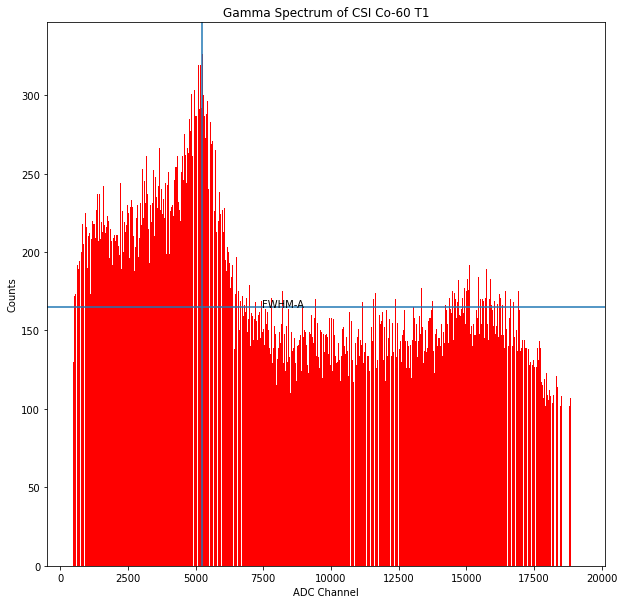

the FWHM of the Compton peak is 6910.0 channels  where the max count occurs at ADC channel 5225.0  corresponding to energy 218.49 keV 
The average conversion factor for CSI for Co is 0.04181626794258373
The resolution of the crystal at the Compton Scattering peak is 132.2488% Where the total average is 132.2488%


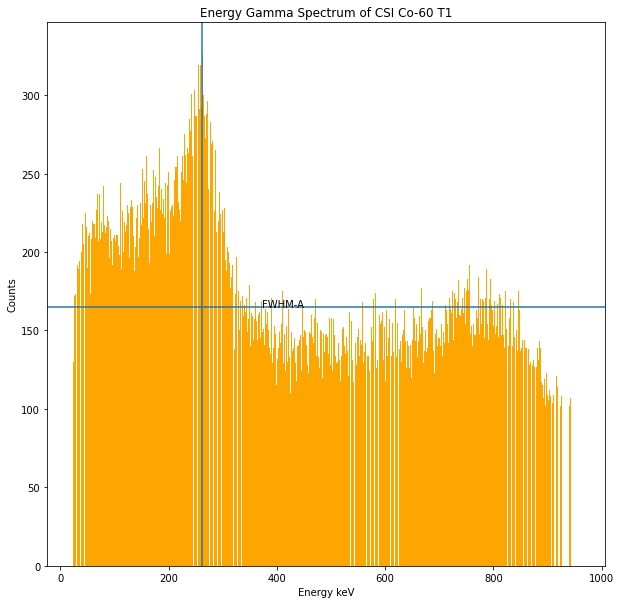

In [ ]:
#BGO
#Co60
#Counts vs ADC
#ADC vs Energy - conversion factor
#Counts vs Energy
#Resolution vs Energy - FWHM

#Energy levels Literature
#Energy of Compton Efect - 209.8keV, 227.18keV , 233.10
#Energy of Compton edge - 963.4keV, 923keV
#Energy of First Peak - 1173.2keV, 1173keV , 1172.64
#Energy of Second Peak - 1332.5keV, 1332, 1332.09
Ave_Energy_Compton = (209.8+227.18)/2
Ave_Energy_ComptonW = (963.4+923)/2


BGO_Co = pd.read_excel('Co60-BGO-ADCvCount-G30-Th35.xlsx', usecols = [0,1])

BGO_Co.drop([0])
print(BGO_Co)

#turn the two columns of BGO_Co into one list 
List_Counts = BGO_Co['Counts - Charge distribution'].tolist()
Counts = []
for i in List_Counts:
  Counts.append(int(i))
List_ADC = BGO_Co['ADC Channel - Charge distribution'].tolist()
Histogram = []
for i in range(len(List_Counts)):
  Histogram.extend([List_ADC[i]]*Counts[i])

##Find the ADC Channel corresponding to max count value for BGO_Co
#Find the FWHM

A = List_Counts[:700]
B = List_ADC[:700]


max_CountA = max(A)


index_max_CountA = BGO_Co.loc[BGO_Co['Counts - Charge distribution'] == max_CountA].index.values
ADC_max_CountA = BGO_Co.at[int(index_max_CountA)+25, 'ADC Channel - Charge distribution']
print(max(A))
print(index_max_CountA)
print(f'The max counts for peaks 1 are {max_CountA}  at ADC channels {ADC_max_CountA} ')
FWHMA = []
for i in range(len(A)):
  if A[i] >= max_CountA/2:
    FWHMA.append(B[i])
print(FWHMA)
FWHM_minA = FWHMA[0]
FWHM_maxA = FWHMA[-1]

#FWHMC = []
#for i in range(len(C)):
#  if C[i] >= max_CountC/2:
#    FWHMC.append(D[i])
#print(FWHMC)
#FWHM_minC = FWHMC[0]
#FWHM_maxC = FWHMC[-1]



Hist = pd.DataFrame({'Hist': Histogram})
print(Hist)
print(Hist.describe())

#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist(Histogram, bins = 2000, color = 'r')
plt.axvline(x = ADC_max_CountA)
plt.axhline(y = 0.5*max_CountA)

plt.title('Gamma Spectrum of CSI Co-60 T1')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_maxA+10, max_CountA/2, 'FWHM-A' )
plt.show()
print(f'the FWHM of the Compton peak is {FWHM_maxA-FWHM_minA} channels  where the max count occurs at ADC channel {round(ADC_max_CountA, 5)}  corresponding to energy {round(Ave_Energy_Compton, 5)} keV ')

#Conversion Factors
#Compton
ConC = Ave_Energy_Compton/ADC_max_CountA 

#Average Conversion Factor
#Ave_Con = (ConC+ConP1+ConP2)/3
print(f'The average conversion factor for CSI for Co is {ConC}')
#The Resolution ER = FWHM_peak/E_peak *100%
#Compton
ERC = (FWHM_maxA - FWHM_minA)/Ave_Energy_Compton * 100*ConC


#Overall
##Ave_ER = (ERC + ERP1 + ERP2)/3
print(f'The resolution of the crystal at the Compton Scattering peak is {round(ERC, 5)}% Where the total average is {round(ERC, 5)}%')

#Energy vs Counts
#Conversion factor of BGO = 0.05 pm 0.05
#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist([0.05*i for i in Histogram], bins = 2000, color = 'orange')
plt.axvline(x = ADC_max_CountA*0.05)
plt.axhline(y = 0.5*max_CountA)
plt.title('Energy Gamma Spectrum of CSI Co-60 T1')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.text((FWHM_maxA+10)*0.05, max_CountA/2, 'FWHM-A' )
plt.show()

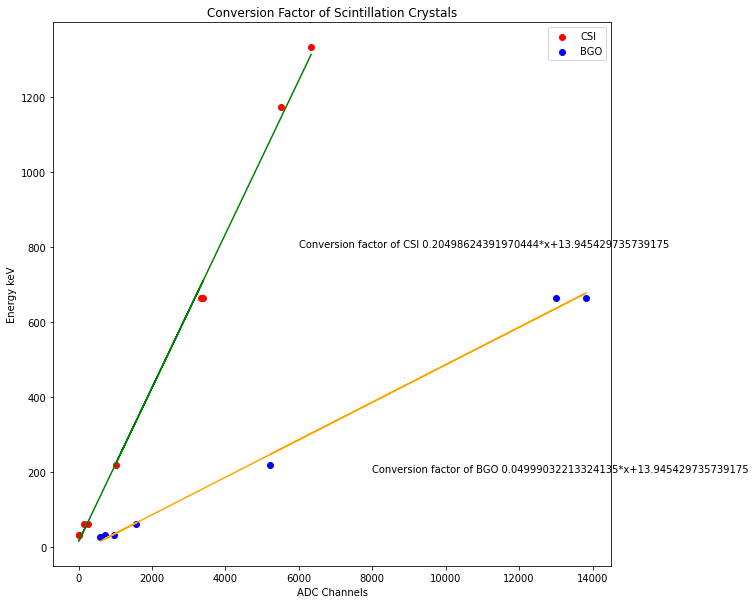

the best conversion factors for CSI and BGO crystals are 0.20498624391970444 pm 0.20626058219589322  and 0.04999032213324135 pm 0.049132162446026376 respectively
Therefore we have for CSI and BGO a conversion factor of 0.2 pm 0.2 and 0.05 pm 0.05 respectively


<Figure size 720x720 with 0 Axes>

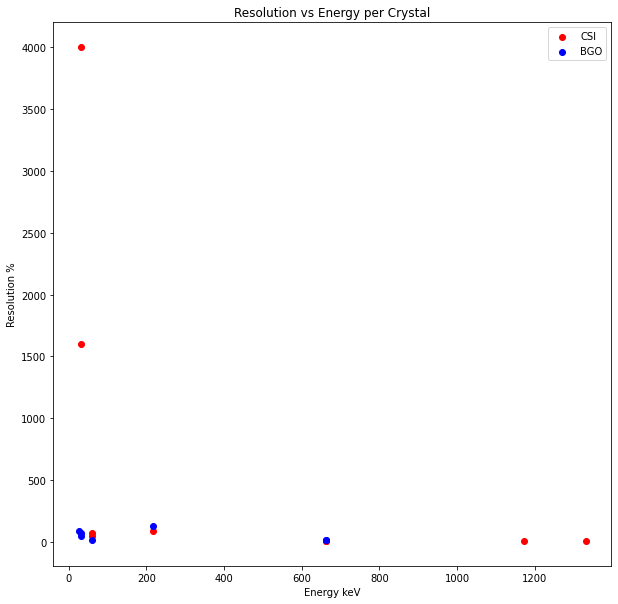

In [ ]:
####DHRUV ADD LYSO CRYSTAL TO THIS PIECE OF CODE


#AVERAGE CONVERSION FACTOR OF EACH CRYSTAL -> Energy
#Plot ADC vs Energy to get conversion factor for crystal
#Plot Counts vs Energy 
#CSI
#Am - 0.38417204301075264 and 0.23351633986928103 -> 59.54666666666666 and 59.54666666666666 keV
#Channels - 155 and 255
#Resolution - 77.41935 and 47.05882
#Cs - 6.4 and 2.1333333333333333 & 0.19905263157894737 and 0.19523598820059 ->  32.0 and 32.0 & 661.85 and 661.85 keV
#Channels - 5 and 15 & 3325 and 3390
#Resolution - 4000.0 and 1600.0 & 11.42857 and 11.50442
#Co - 0.2131609756097561, 0.21241628959276015 and 0.21033938437253355 -> 218.49, 1173.6 and 1332.5 keV 
#Channels - 1025.0, 5525.0 and 6335.0
#Resolution - 92.68293,  13.39367 and 8.99763

#BGO
#Am - 0.04424918767507003 and 0.0378074074074074 ->  26.328266666666668 and 59.54666666666666 keV
#Channels - 595.0 and 1575.0
#Resolution - 87.39496 and 21.5873
#Cs - 0.044755244755244755 and 0.03282051282051282 & 0.05085286208221283 and 0.04787341772151899 ->  32.0 and 32.0 & 661.85 and 661.85 keV
#Channels - 715.0 and 975 & 13015.0 and 13825.0
#Resolution - 50.34965 and 73.84615 & 16.7499 and 14.53888
#Co - 0.04181626794258373 -> 218.49keV
#Channels - 5225
#Resolution - 132.2488

CSI_Con = [0.38417204301075264, 0.23351633986928103, 6.4, 2.1333333333333333, 0.19905263157894737, 0.19523598820059, 0.2131609756097561, 0.21241628959276015, 0.21033938437253355]
CSI_E = [59.54666666666666, 59.54666666666666, 32.0, 32.0,  661.85, 661.85, 218.49, 1173.6, 1332.5]
CSI_ADC = [155, 255, 5, 15, 3325, 3390, 1025, 5525, 6335] 
CSI_Res = [77.41935, 47.05882, 4000.0, 1600.0, 11.42857, 11.50442, 92.68293,  13.39367, 8.99763]

BGO_Con = [0.04424918767507003, 0.0378074074074074, 0.044755244755244755, 0.03282051282051282, 0.05085286208221283, 0.04787341772151899, 0.04181626794258373]
BGO_E = [26.328266666666668, 59.54666666666666, 32.0, 32.0, 661.85, 661.85, 218.49]
BGO_ADC = [595, 1575, 715, 975, 13015, 13825, 5225]
BGO_Res = [87.39496, 21.5873, 50.34965, 73.84615, 16.7499, 14.53888, 132.2488]

#Plot Energy keV vs ADC Channels for both BGO and CSI
plt.figure(figsize = (10,10))
a, b = np.polyfit(CSI_ADC, CSI_E, 1)
c, d = np.polyfit(BGO_ADC, BGO_E, 1)
plt.scatter(CSI_ADC, CSI_E, color ='r', label = 'CSI')
plt.plot(CSI_ADC, [a*i +b for i in CSI_ADC], 'g')
plt.scatter(BGO_ADC, BGO_E, color = 'b', label = 'BGO')
plt.plot(BGO_ADC, [c*j+d for j in BGO_ADC], color = 'orange')
plt.xlabel('ADC Channels')
plt.ylabel('Energy keV')
plt.title('Conversion Factor of Scintillation Crystals')
plt.text(6000, 800, f'Conversion factor of CSI {a}*x+{b}' )
plt.text(8000, 200, f'Conversion factor of BGO {c}*x+{b}' )
plt.legend()
plt.show()
#Error
#CSI
max_grad_CSI = (CSI_E[8] - CSI_E[4])/(CSI_ADC[8] - CSI_ADC[4])
min_grad_CSI = (CSI_E[4] - CSI_E[2])/(CSI_ADC[4] - CSI_ADC[2])
error_CSI = 0.5*(max_grad_CSI + min_grad_CSI)

#BGO
max_grad_BGO = (BGO_E[4] - BGO_E[6])/(BGO_ADC[4] - BGO_ADC[6])
min_grad_BGO = (BGO_E[6] - BGO_E[2])/(BGO_ADC[6] - BGO_ADC[2])
error_BGO = 0.5*(max_grad_BGO + min_grad_BGO)
print(f'the best conversion factors for CSI and BGO crystals are {a} pm {error_CSI}  and {c} pm {error_BGO} respectively')
print(f'Therefore we have for CSI and BGO a conversion factor of {0.2} pm {0.2} and {0.05} pm {0.05} respectively')

#Plot Resolution vs Energy keV
plt.figure(figsize = (10,10))
plt.figure(figsize = (10,10))
a1, b1 = np.polyfit(CSI_ADC, CSI_E, 1)
c1, d1 = np.polyfit(BGO_ADC, BGO_E, 1)
plt.scatter(CSI_E, CSI_Res, color ='r', label = 'CSI')
#plt.plot(CSI_E, [a1*i +b1 for i in CSI_E], 'g')
plt.scatter(BGO_E, BGO_Res, color = 'b', label = 'BGO')
#plt.plot(BGO_E, [c1*j+d1 for j in BGO_E], color = 'orange')
plt.xlabel('Energy keV')
plt.ylabel('Resolution %')
plt.title('Resolution vs Energy per Crystal')
#plt.text(6000, 800, f'Conversion factor of CSI {a1}*x+{b1}' )
#plt.text(8000, 200, f'Conversion factor of BGO {c1}*x+{b1}' )
plt.legend()
plt.show()


     ADC Channels - Charge distribution  Counts - Charge distribution
0                                -495.0                           6.0
1                                -485.0                           4.0
2                                -475.0                           4.0
3                                -465.0                           2.0
4                                -455.0                           5.0
..                                  ...                           ...
366                              3165.0                           0.0
367                              3175.0                           0.0
368                              3185.0                           0.0
369                              3195.0                           1.0
370                              3205.0                           0.0

[371 rows x 2 columns]
2075.0 5044.0
[65] [119]
The max counts for peaks 1 and 2 are 2075.0 and 5044.0  at ADC channels 155.0 and 695.0 
[75.0, 85.0, 95.0, 105

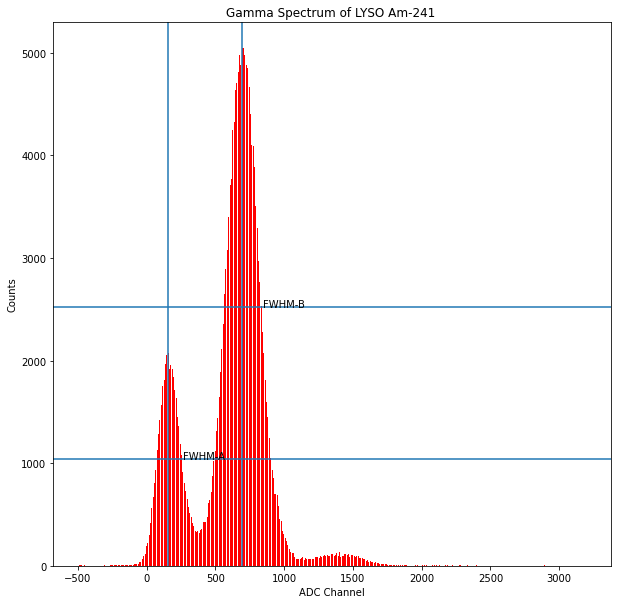

the FWHM of the two peaks are  is 180.0 and 270.0 channels  where the max count occurs at ADC channel 155.0 and 695.0 corresponding to energy  26.32827 and 59.54667 keV 
The average conversion factor for CSI for Co is 0.12776922101028854 from peaks 1 and 2 being 0.16985978494623657 and 0.08567865707434051
The resolution of the crystal at peaks 1 and 2 is 116.12903% and 38.84892% Where the total average is 77.48898%


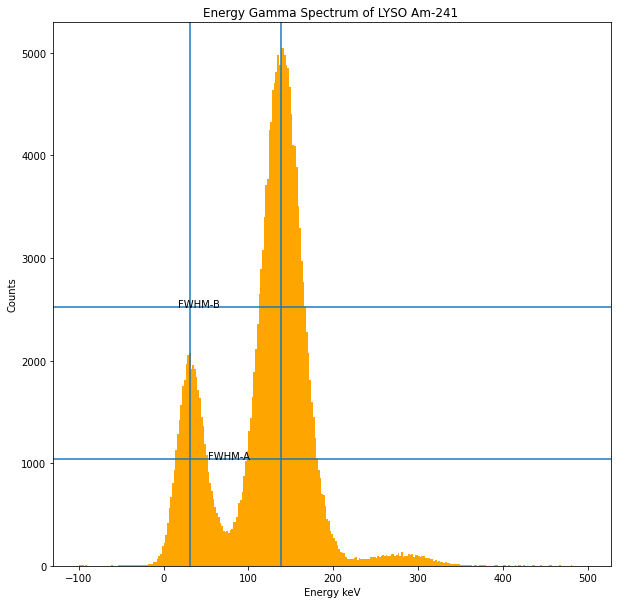

In [ ]:
#LYSO
#Am241
#Counts vs ADC
#ADC vs Energy - conversion factor
#Counts vs Energy
#Resolution vs Energy - FWHM

#Energy levels Literature
#Main peak Energy Literature = 59.6keV, 59,54keV, 59.5keV
#First smaller peak = 26.34keV, 26.3keV, 26.3448keV 
Ave_Energy_Peak1 = (26.34+26.3+26.3448)/3
Ave_Energy_Peak2 = (59.6+59.54+59.5)/3


LYSO_Am = pd.read_excel('AM241-lyso-ADCvsCounts-G32-TH50.xlsx', usecols = [0,1])

LYSO_Am.drop([0])
print(LYSO_Am)

#turn the two columns of LYSO_Am into one list 
List_Counts = LYSO_Am['Counts - Charge distribution'].tolist()
Counts = []
for i in List_Counts:
  Counts.append(int(i))
List_ADC = LYSO_Am['ADC Channels - Charge distribution'].tolist()
Histogram = []
for i in range(len(List_Counts)):
  Histogram.extend([List_ADC[i]]*Counts[i])

##Find the ADC Channel corresponding to max count value for LYSO_Am
#Find the FWHM

A = List_Counts[:90]
B = List_ADC[:90]
C = List_Counts[91:-1]
D = List_ADC[91:-1]
max_CountA = max(A)
max_CountC = max(C)
print(max(A),max(C))
index_max_CountA = LYSO_Am.loc[LYSO_Am['Counts - Charge distribution'] == max_CountA].index.values
ADC_max_CountA = LYSO_Am.at[int(index_max_CountA), 'ADC Channels - Charge distribution']
index_max_CountC = LYSO_Am.loc[LYSO_Am['Counts - Charge distribution'] == max_CountC].index.values
print(index_max_CountA,index_max_CountC)
ADC_max_CountC = LYSO_Am.at[int(index_max_CountC), 'ADC Channels - Charge distribution']
print(f'The max counts for peaks 1 and 2 are {max_CountA} and {max_CountC}  at ADC channels {ADC_max_CountA} and {ADC_max_CountC} ')
FWHMA = []
for i in range(len(A)):
  if A[i] >= max_CountA/2:
    FWHMA.append(B[i])
print(FWHMA)
FWHM_minA = FWHMA[0]
FWHM_maxA = FWHMA[-1]

FWHMC = []
for i in range(len(C)):
  if C[i] >= max_CountC/2:
    FWHMC.append(D[i])
print(FWHMC)
FWHM_minC = FWHMC[0]
FWHM_maxC = FWHMC[-1]



Hist = pd.DataFrame({'Hist': Histogram})
print(Hist)
print(Hist.describe())

#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist(Histogram, bins = 500, color = 'r')
plt.axvline(x = ADC_max_CountA)
plt.axhline(y = 0.5*max_CountA)
#plt.axvline(x = ADC_max_CountC)
plt.axvline(x = 695)
plt.axhline(y = 0.5*max_CountC)
plt.title('Gamma Spectrum of LYSO Am-241 ')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_maxA+10, max_CountA/2, 'FWHM-A' )
plt.text(FWHM_maxC+10, max_CountC/2, 'FWHM-B' )
plt.show()
print(f'the FWHM of the two peaks are  is {FWHM_maxA-FWHM_minA} and {FWHM_maxC-FWHM_minC} channels  where the max count occurs at ADC channel {round(ADC_max_CountA, 5)} and {round(ADC_max_CountC, 5)} corresponding to energy  {round(Ave_Energy_Peak1, 5)} and {round(Ave_Energy_Peak2, 5)} keV ')

#Conversion Factors
#Peaks
ConP1 = Ave_Energy_Peak1/ADC_max_CountA 
ConP2 = Ave_Energy_Peak2/ADC_max_CountC 
#Average Conversion Factor
Ave_Con = (ConP1+ConP2)/2
print(f'The average conversion factor for CSI for Co is {Ave_Con} from peaks 1 and 2 being {ConP1} and {ConP2}')
#The Resolution ER = FWHM_peak/E_peak *100%
#Peaks
ERP1 = (FWHM_maxA - FWHM_minA)/Ave_Energy_Peak1 * 100*ConP1
ERP2 = (FWHM_maxC - FWHM_minC)/Ave_Energy_Peak2 * 100*ConP2

#Overall
Ave_ER = (ERP1 + ERP2)/2
print(f'The resolution of the crystal at peaks 1 and 2 is {round(ERP1, 5)}% and {round(ERP2, 5)}% Where the total average is {round(Ave_ER, 5)}%')

#Energy vs Counts
#Conversion factor of BGO = 0.2 pm 0.2
#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist([0.2*i for i in Histogram], range(-100, 500, 2), color = 'orange')
plt.axvline(x = ADC_max_CountA*0.2)
plt.axhline(y = 0.5*max_CountA)
#plt.axvline(x = ADC_max_CountC*0.2)
plt.axvline(x = 695*0.2)
plt.axhline(y = 0.5*max_CountC)
plt.title('Energy Gamma Spectrum of LYSO Am-241 ')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.text((FWHM_maxA+10)*0.2, max_CountA/2, 'FWHM-A' )
plt.text((FWHM_maxC+10)*0.02, max_CountC/2, 'FWHM-B' )
plt.show()

      ADC Channels - Charge distribution  Counts - Charge distribution
0                                   -495                             2
1                                   -485                             2
2                                   -475                             1
3                                   -465                             0
4                                   -455                             1
...                                  ...                           ...
1995                               19455                             0
1996                               19465                             0
1997                               19475                             0
1998                               19485                             0
1999                               19495                             0

[2000 rows x 2 columns]
1772 351
[77] [844]
The max counts for peaks 1 and 2 are 1772 and 351  at ADC channels 275 and 11385 
[195, 205, 215, 225, 

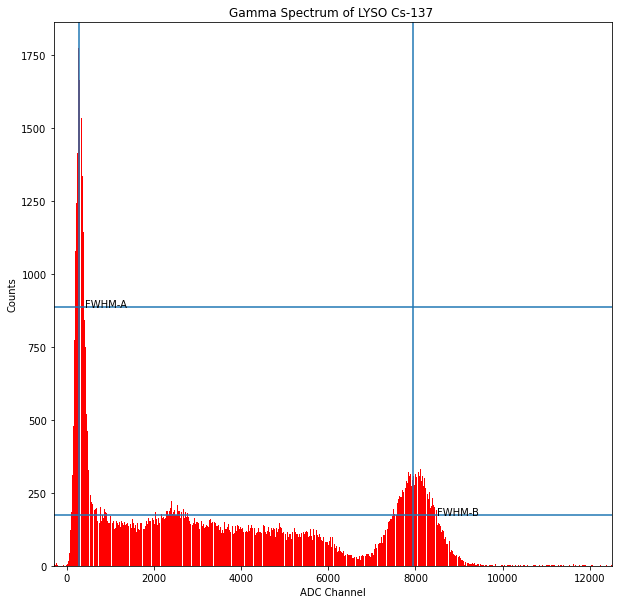

the FWHM of the two peaks are  is 210 and 990 channels  where the max count occurs at ADC channel 275 and 7945 corresponding to energy  1173.6 and 1332.5 keV 
11385
The average conversion factor for CSI for Co is 2.1923381642512076 from peaks 1 and 2 being 4.267636363636363 and 0.11703996486605182
The resolution of the crystal at peaks 1 and 2 is 76.36364% and 8.69565% Where the total average is 42.52964%


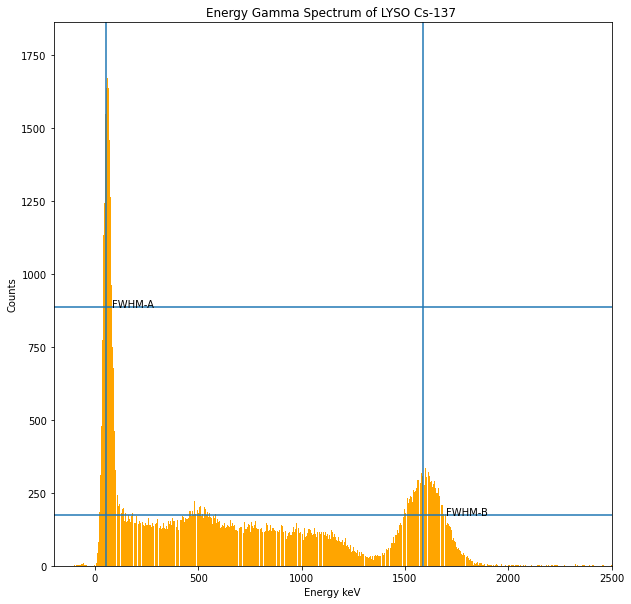

In [ ]:
#LYSO
#Cs137
#Counts vs ADC
#ADC vs Energy - conversion factor
#Counts vs Energy
#Resolution vs Energy - FWHM

#First peak Literature = 32keV
#Main peak = 662keV, 661.7keV
Ave_First_Energy_Peak = (32+32)/2
Ave_Main_Energy_Peak = (662+661.7)/2

LYSO_Cs = pd.read_excel('Cs137-LYSO-ADCvCount-G30-Th50.xlsx', usecols = [0,1])

LYSO_Cs.drop([0])
print(LYSO_Cs)

#turn the two columns of LYSO_Cs into one list 
List_Counts = LYSO_Cs['Counts - Charge distribution'].tolist()
Counts = []
for i in List_Counts:
  Counts.append(int(i))
List_ADC = LYSO_Cs['ADC Channels - Charge distribution'].tolist()
Histogram = []
for i in range(len(List_Counts)):
  Histogram.extend([List_ADC[i]]*Counts[i])

##Find the ADC Channel corresponding to max count value for LYSO_Cs
#Find the FWHM

A = List_Counts[:700]
B = List_ADC[:700]
C = List_Counts[701:-1]
D = List_ADC[701:-1]
max_CountA = max(A)
max_CountC = max(C)
print(max(A),max(C))
index_max_CountA = LYSO_Cs.loc[LYSO_Cs['Counts - Charge distribution'] == max_CountA].index.values
ADC_max_CountA = LYSO_Cs.at[int(index_max_CountA), 'ADC Channels - Charge distribution']
index_max_CountC = LYSO_Cs.loc[LYSO_Cs['Counts - Charge distribution'] == max_CountC].index.values
print(index_max_CountA,index_max_CountC)
ADC_max_CountAC = LYSO_Cs.at[int(index_max_CountC), 'ADC Channels - Charge distribution']
print(f'The max counts for peaks 1 and 2 are {max_CountA} and {max_CountC}  at ADC channels {ADC_max_CountA} and {ADC_max_CountC} ')
FWHMA = []
for i in range(len(A)):
  if A[i] >= max_CountA/2:
    FWHMA.append(B[i])
print(FWHMA)
FWHM_minA = FWHMA[0]
FWHM_maxA = FWHMA[-1]

FWHMC = []
for i in range(len(C)):
  if C[i] >= max_CountC/2:
    FWHMC.append(D[i])
print(FWHMC)
FWHM_minC = FWHMC[0]
FWHM_maxC = FWHMC[-1]



Hist = pd.DataFrame({'Hist': Histogram})
print(Hist)
print(Hist.describe())

#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist(Histogram, bins = 2000, color = 'r')
plt.axvline(x = ADC_max_CountA)
plt.axhline(y = 0.5*max_CountA)
#plt.axvline(x = ADC_max_CountC)
plt.axvline(x = 7945)
plt.axhline(y = 0.5*max_CountC)
plt.title('Gamma Spectrum of LYSO Cs-137 ')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.xlim([-300, 12500])
plt.text(FWHM_maxA+10, max_CountA/2, 'FWHM-A' )
plt.text(FWHM_maxC+10, max_CountC/2, 'FWHM-B' )
plt.show()
print(f'the FWHM of the two peaks are  is {FWHM_maxA-FWHM_minA} and {FWHM_maxC-FWHM_minC} channels  where the max count occurs at ADC channel {round(ADC_max_CountA, 5)} and {7945} corresponding to energy  {round(Ave_Energy_Peak1, 5)} and {round(Ave_Energy_Peak2, 5)} keV ')
print(ADC_max_CountC)
#Conversion Factors
#Peaks
ConP1 = Ave_Energy_Peak1/ADC_max_CountA 
ConP2 = Ave_Energy_Peak2/ADC_max_CountC 
#Average Conversion Factor
Ave_Con = (ConP1+ConP2)/2
print(f'The average conversion factor for CSI for Co is {Ave_Con} from peaks 1 and 2 being {ConP1} and {ConP2}')
#The Resolution ER = FWHM_peak/E_peak *100%
#Peaks
ERP1 = (FWHM_maxA - FWHM_minA)/Ave_Energy_Peak1 * 100*ConP1
ERP2 = (FWHM_maxC - FWHM_minC)/Ave_Energy_Peak2 * 100*ConP2

#Overall
Ave_ER = (ERP1 + ERP2)/2
print(f'The resolution of the crystal at peaks 1 and 2 is {round(ERP1, 5)}% and {round(ERP2, 5)}% Where the total average is {round(Ave_ER, 5)}%')

#Energy vs Counts
#Conversion factor of BGO = 0.05 pm 0.05
#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist([0.2*i for i in Histogram], 2000, color = 'orange')
plt.axvline(x = ADC_max_CountA*0.2)
plt.axhline(y = 0.5*max_CountA)
#plt.axvline(x = ADC_max_CountC*0.05)
plt.axvline(x = 7945*0.2)
plt.axhline(y = 0.5*max_CountC)
plt.title('Energy Gamma Spectrum of LYSO Cs-137 ')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.xlim([-200, 2500])
plt.text((FWHM_maxA+10)*0.2, max_CountA/2, 'FWHM-A' )
plt.text((FWHM_maxC+10)*0.2, max_CountC/2, 'FWHM-B' )
plt.show()

      ADC Channels - Charge distribution  Counts - Charge distribution
0                                   -495                             1
1                                   -485                             0
2                                   -475                             1
3                                   -465                             1
4                                   -455                             0
...                                  ...                           ...
1995                               19455                             0
1996                               19465                             2
1997                               19475                             1
1998                               19485                             0
1999                               19495                             0

[2000 rows x 2 columns]
      ADC Channels - Charge distribution  Counts - Charge distribution
0                                   -495            

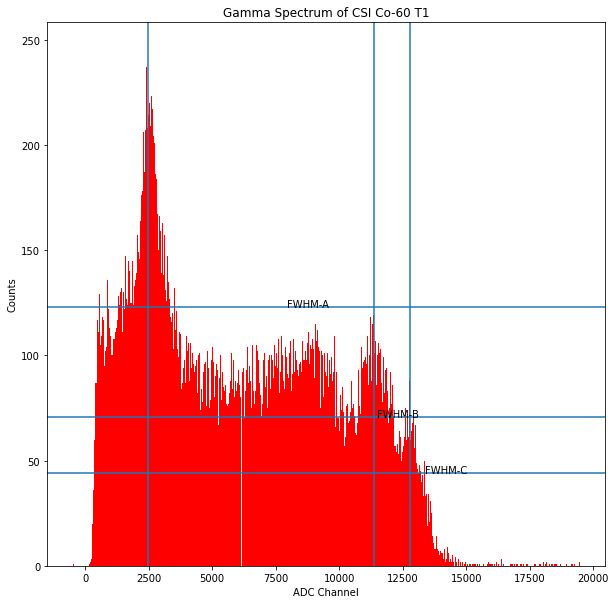

the FWHM of the three peaks T1 are 7370, 980 and 1100 where the max count occurs at ADC channel 2485, 11385 and 12775  corresponding to energy 218.49, 1173.6 and 1332.5 keV respectively


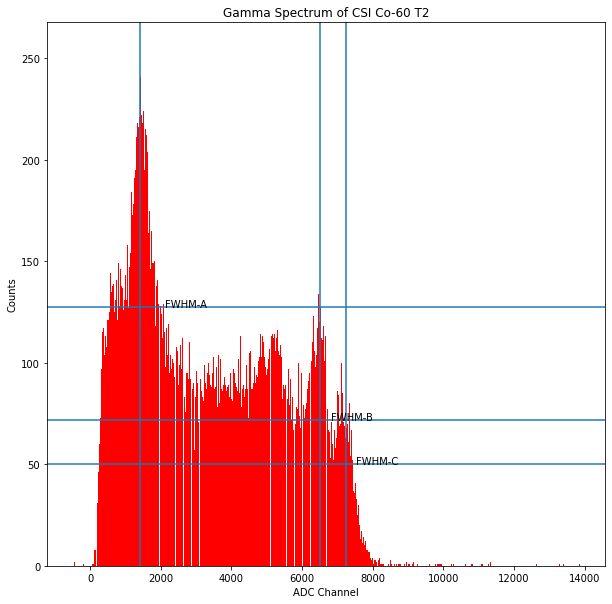

the FWHM of the three peaks T1 are 1540, 1050 and 640 where the max count occurs at ADC channel 1415, 6515 and 7255  corresponding to energy 218.49, 1173.6 and 1332.5 keV respectively
The average conversion factor for LYSO for Co for T1 and T2 is 0.09843727631913086 and 0.17273815789349334 from compton, peaks 1 and 2 are 0.08792354124748492, 0.10308300395256917 and 0.10430528375733855 & 0.15440989399293287, 0.18013814274750575 and 0.18366643694004134 -> 0.1355877171063121 respectively
The resolution of the crystal at each peak for T1 & T2 are 296.57948%,  8.60782% and 8.61057% &  108.83392%,  16.11665% and 8.8215% Where the total average is 104.59929% and 44.59069% -> 74.59499%


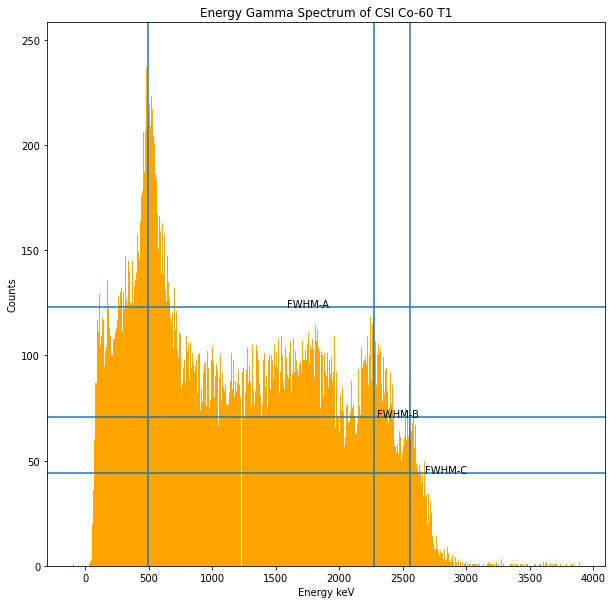

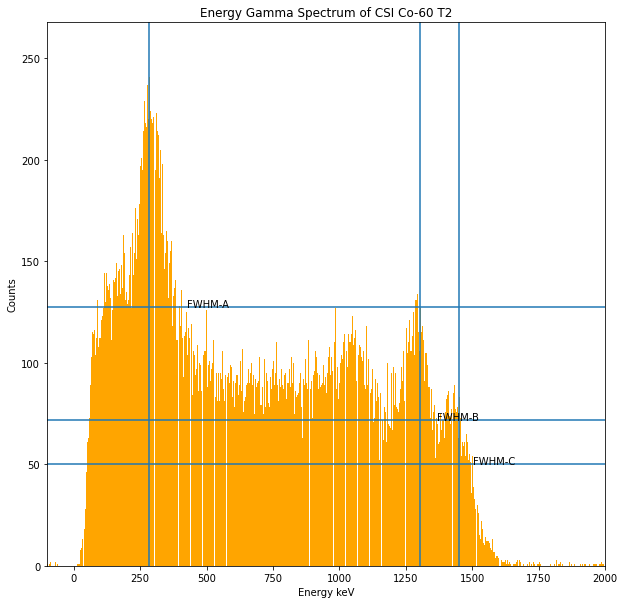

In [ ]:
#LYSO
#Co60
#Counts vs ADC
#ADC vs Energy - conversion factor
#Counts vs Energy
#Resolution vs Energy - FWHM

#Energy levels Literature
#Energy of Compton Efect - 209.8keV, 227.18keV 
#Energy of First Peak - 1173.2keV, 1174keV 
#Energy of Second Peak - 1332.5keV, 
Ave_Energy_Compton = (209.8+227.18)/2
Ave_Energy_Peak1 = (1173.2+1174)/2
Ave_Energy_Peak2 = 1332.5

LYSO_Co = pd.read_excel('Co60-LYSO-ADCvCount-G25-Th50.xlsx', usecols = [0,1])
LYSO_Co1 = pd.read_excel('Co60-LYSO-ADCvCount-G27-Th50.xlsx', usecols = [0,1])

LYSO_Co.drop([0])
print(LYSO_Co)
LYSO_Co1.drop([0])
print(LYSO_Co1)

#turn the two columns of LYSO_Co into one list 
List_Counts = LYSO_Co['Counts - Charge distribution'].tolist()
Counts = []
for i in List_Counts:
  Counts.append(int(i))
List_ADC = LYSO_Co['ADC Channels - Charge distribution'].tolist()
Histogram = []
for i in range(len(List_Counts)):
  Histogram.extend([List_ADC[i]]*Counts[i])

#turn the two columns of LYSO_Co1 into one list 
List_Counts1 = LYSO_Co1['Counts - Charge distribution'].tolist()
Counts1 = []
for i in List_Counts1:
  Counts1.append(int(i))
List_ADC1 = LYSO_Co1['ADC Channels - Charge distribution'].tolist()
Histogram1 = []
for i in range(len(List_Counts1)):
  Histogram1.extend([List_ADC1[i]]*Counts1[i])

##Find the ADC Channel corresponding to max count value for LYSO_Co
#Find the FWHM

A = List_Counts[:1100]
B = List_ADC[:1100]
C = List_Counts[1101:1200]
D = List_ADC[1101:1275]
E = List_Counts[1276:-1]
F = List_ADC[1276:-1]
#G = List_Counts[540:650]
#H = List_ADC[540:650]
max_CountA = max(A)
max_CountC = max(C)
max_CountE = max(E)

index_max_CountA = LYSO_Co.loc[LYSO_Co['Counts - Charge distribution'] == max_CountA].index.values
ADC_max_CountA = LYSO_Co.at[int(index_max_CountA), 'ADC Channels - Charge distribution']
index_max_CountC = LYSO_Co.loc[LYSO_Co['Counts - Charge distribution'] == max_CountC].index.values
ADC_max_CountC = LYSO_Co.at[int(index_max_CountC[-1]), 'ADC Channels - Charge distribution']
index_max_CountE = LYSO_Co.loc[LYSO_Co['Counts - Charge distribution'] == max_CountE].index.values
ADC_max_CountE = LYSO_Co.at[int(index_max_CountE[-1]), 'ADC Channels - Charge distribution']
print(f'The max counts for peaks 1,2 and 3 T1 are {max_CountA}, {max_CountC} and {max_CountE} at ADC channels {ADC_max_CountA}, {ADC_max_CountC} and {ADC_max_CountE} ')
FWHMA = []
for i in range(len(A)):
  if A[i] >= max_CountA/2:
    FWHMA.append(B[i])
print(FWHMA)
FWHM_minA = FWHMA[0]
FWHM_maxA = FWHMA[-1]

FWHMC = []
for i in range(len(C)):
  if C[i] >= max_CountC/2:
    FWHMC.append(D[i])
print(FWHMC)
FWHM_minC = FWHMC[0]
FWHM_maxC = FWHMC[-1]

FWHME = []
for i in range(len(E)):
  if E[i] >= max_CountE/2:
    FWHME.append(F[i])
print(FWHME)
FWHM_minE = FWHME[0]
FWHM_maxE = FWHME[-1]

##Find the ADC Channel corresponding to max count value for LYSO_Co1
#Find the FWHM

A1 = List_Counts1[100:625]
B1 = List_ADC1[100:625]
C1 = List_Counts1[626:735]
D1 = List_ADC1[626:735]
E1 = List_Counts1[736:-1]
F1 = List_ADC1[736:-1]
#G1 = List_Counts[540:650]
#H1 = List_ADC[540:650]
max_CountA1 = max(A1)
max_CountC1 = max(C1)
max_CountE1 = max(E1)
print(A1)
print(max(A1), max(C1), max(E1))
print(index_max_CountA1, index_max_CountC1, index_max_CountE1)
index_max_CountA1 = LYSO_Co1.loc[LYSO_Co1['Counts - Charge distribution'] == max_CountA1].index.values
ADC_max_CountA1 = LYSO_Co1.at[int(index_max_CountA1), 'ADC Channels - Charge distribution']
index_max_CountC1 = LYSO_Co1.loc[LYSO_Co1['Counts - Charge distribution'] == max_CountC1].index.values
ADC_max_CountC1 = LYSO_Co1.at[int(index_max_CountC1[-1]), 'ADC Channels - Charge distribution']
index_max_CountE1 = LYSO_Co1.loc[LYSO_Co['Counts - Charge distribution'] == max_CountE1].index.values
ADC_max_CountE1 = LYSO_Co1.at[int(index_max_CountE1[12]), 'ADC Channels - Charge distribution']
print(f'The max counts for peaks 1,2 and 3 T2 are {max_CountA1}, {max_CountC1} and {max_CountE1} at ADC channels {ADC_max_CountA1}, {ADC_max_CountC1} and {ADC_max_CountE1} ')
FWHMA1 = []
for i in range(len(A1)):
  if A1[i] >= max_CountA1/2:
    FWHMA1.append(B1[i])
print(FWHMA1)
FWHM_minA1 = FWHMA1[0]
FWHM_maxA1 = FWHMA1[-1]

FWHMC1= []
for i in range(len(C1)):
  if C1[i] >= max_CountC1/2:
    FWHMC1.append(D1[i])
print(FWHMC1)
FWHM_minC1 = FWHMC1[0]
FWHM_maxC1 = FWHMC1[-1]

FWHME1 = []
for i in range(len(E1)):
  if E1[i] >= max_CountE1/2:
    FWHME1.append(F1[i])
print(FWHME1)
FWHM_minE1 = FWHME1[0]
FWHM_maxE1 = FWHME1[-1]


Hist = pd.DataFrame({'Hist': Histogram})
print(Hist)
print(Hist.describe())
Hist1 = pd.DataFrame({'Hist': Histogram1})
print(Hist1)
print(Hist1.describe())

#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist(Histogram, bins = 2000, color = 'r')
plt.axvline(x = ADC_max_CountA)
plt.axhline(y = 0.5*max_CountA)
plt.axvline(x = ADC_max_CountC)
plt.axhline(y = 0.5*max_CountC)
plt.axvline(x = ADC_max_CountE)
plt.axhline(y = 0.5*max_CountE)
plt.title('Gamma Spectrum of CSI Co-60 T1')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_maxA+10, max_CountA/2, 'FWHM-A' )
plt.text(FWHM_maxC+10, max_CountC/2, 'FWHM-B' )
plt.text(FWHM_maxE+10, max_CountE/2, 'FWHM-C' )
plt.show()
print(f'the FWHM of the three peaks T1 are {FWHM_maxA-FWHM_minA}, {FWHM_maxC-FWHM_minC} and {FWHM_maxE-FWHM_minE} where the max count occurs at ADC channel {round(ADC_max_CountA, 5)}, {round(ADC_max_CountC, 5)} and {round(ADC_max_CountE, 5)}  corresponding to energy {round(Ave_Energy_Compton, 5)}, {round(Ave_Energy_Peak1, 5)} and {round(Ave_Energy_Peak2, 5)} keV respectively')


#Plot graph of Counts vs ADC channels for Test 2
plt.figure(figsize = (10,10))
plt.hist(Histogram1, bins = 1500, color = 'r')
plt.axvline(x = ADC_max_CountA1)
plt.axhline(y = 0.5*max_CountA1)
plt.axvline(x = ADC_max_CountC1)
plt.axhline(y = 0.5*max_CountC1)
plt.axvline(x = ADC_max_CountE1)
plt.axhline(y = 0.5*max_CountE1)
plt.title('Gamma Spectrum of CSI Co-60 T2')
plt.xlabel('ADC Channel')
plt.ylabel('Counts')
plt.text(FWHM_maxA1+10, max_CountA1/2, 'FWHM-A' )
plt.text(FWHM_maxC1+10, max_CountC1/2, 'FWHM-B' )
plt.text(FWHM_maxE1+10, max_CountE1/2, 'FWHM-C' )
plt.show()
print(f'the FWHM of the three peaks T1 are {FWHM_maxA1-FWHM_minA1}, {FWHM_maxC1-FWHM_minC1} and {FWHM_maxE1-FWHM_minE1} where the max count occurs at ADC channel {round(ADC_max_CountA1, 5)}, {round(ADC_max_CountC1, 5)} and {round(ADC_max_CountE1, 5)}  corresponding to energy {round(Ave_Energy_Compton, 5)}, {round(Ave_Energy_Peak1, 5)} and {round(Ave_Energy_Peak2, 5)} keV respectively')

#Conversion Factors
#Compton
ConC = Ave_Energy_Compton/ADC_max_CountA 
ConC1 = Ave_Energy_Compton/ADC_max_CountA1
#Peak 1
ConP1 = Ave_Energy_Peak1/ADC_max_CountC 
ConP11 = Ave_Energy_Peak1/ADC_max_CountC1
#Peak 2 
ConP2 = Ave_Energy_Peak2/ADC_max_CountE
ConP21 = Ave_Energy_Peak2/ADC_max_CountE1
#Average Conversion Factor
Ave_Con1 = (ConC+ConP1+ConP2)/3
Ave_Con2 = (ConC1+ConP11+ConP21)/3
Total_Ave_Con = (Ave_Con1+Ave_Con2)/2
print(f'The average conversion factor for LYSO for Co for T1 and T2 is {Ave_Con1} and {Ave_Con2} from compton, peaks 1 and 2 are {ConC}, {ConP1} and {ConP2} & {ConC1}, {ConP11} and {ConP21} -> {Total_Ave_Con} respectively')
#The Resolution ER = FWHM_peak/E_peak *100%
#Compton
ERC = (FWHM_maxA - FWHM_minA)/Ave_Energy_Compton * 100*ConC
ERC1 = (FWHM_maxA1 - FWHM_minA1)/Ave_Energy_Compton * 100*ConC1
#Peak 1
ERP1 = (FWHM_maxC - FWHM_minC)/Ave_Energy_Peak1 * 100*ConP1
ERP11 = (FWHM_maxC1 - FWHM_minC1)/Ave_Energy_Peak1 * 100*ConP11
#Peak 2
ERP2 = (FWHM_maxE - FWHM_minE)/Ave_Energy_Peak2 * 100*ConP2
ERP21 = (FWHM_maxE1 - FWHM_minE1)/Ave_Energy_Peak2 * 100*ConP21

#Overall
Ave_ER = (ERC + ERP1 + ERP2)/3
Ave_ER1 = (ERC1 + ERP11 + ERP21)/3
Total_Ave_ER = (Ave_ER+Ave_ER1)/2
print(f'The resolution of the crystal at each peak for T1 & T2 are {round(ERC, 5)}%,  {round(ERP1, 5)}% and {round(ERP2, 5)}% &  {round(ERC1, 5)}%,  {round(ERP11, 5)}% and {round(ERP21, 5)}% Where the total average is {round(Ave_ER, 5)}% and {round(Ave_ER1, 5)}% -> {round(Total_Ave_ER, 5)}%')

#Plot Energy vs Counts
#Conversion factor is 0.2
#Plot graph of Counts vs ADC channels for Test 1
plt.figure(figsize = (10,10))
plt.hist([i*0.2 for i in Histogram], bins = 2000, color = 'orange')
plt.axvline(x = ADC_max_CountA*0.2)
plt.axhline(y = 0.5*max_CountA)
plt.axvline(x = ADC_max_CountC*0.2)
plt.axhline(y = 0.5*max_CountC)
plt.axvline(x = ADC_max_CountE*0.2)
plt.axhline(y = 0.5*max_CountE)
plt.title('Energy Gamma Spectrum of CSI Co-60 T1')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.text((FWHM_maxA+10)*0.2, max_CountA/2, 'FWHM-A' )
plt.text((FWHM_maxC+10)*0.2, max_CountC/2, 'FWHM-B' )
plt.text((FWHM_maxE+10)*0.2, max_CountE/2, 'FWHM-C' )
plt.show()

#Plot graph of Counts vs ADC channels for Test 2
plt.figure(figsize = (10,10))
plt.hist([i*0.2 for i in Histogram1], bins = 1500, color = 'orange')
plt.axvline(x = ADC_max_CountA1*0.2)
plt.axhline(y = 0.5*max_CountA1)
plt.axvline(x = ADC_max_CountC1*0.2)
plt.axhline(y = 0.5*max_CountC1)
plt.axvline(x = ADC_max_CountE1*0.2)
plt.axhline(y = 0.5*max_CountE1)
plt.title('Energy Gamma Spectrum of CSI Co-60 T2')
plt.xlabel('Energy keV')
plt.ylabel('Counts')
plt.xlim(-100, 2000)
plt.text((FWHM_maxA1+10)*0.2, max_CountA1/2, 'FWHM-A' )
plt.text((FWHM_maxC1+10)*0.2, max_CountC1/2, 'FWHM-B' )
plt.text((FWHM_maxE1+10)*0.2, max_CountE1/2, 'FWHM-C' )
plt.show()

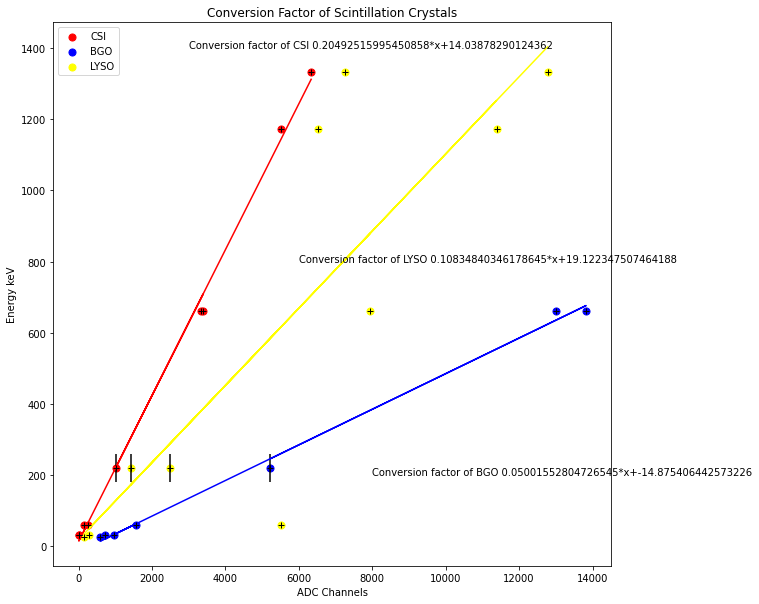

the best conversion factors for CSI, BGO and LYSO crystals are 0.20492515995450858 pm 0.009786789727576989, 0.05001552804726545 pm 0.007465281829851792 and 0.10834840346178645 pm 0.08438966556340466  respectively
Therefore we have for CSI, BGO and LYSO a conversion factor of 0.2 pm 0.2,  0.05 pm 0.007 and 0.1 pm 0.4 respectively
 The conversion factors for the individual crystals from averaging the peak conversion factors for CSI, BGO and LYSO come to 1.1312474428408839 pm 3.102382005899705, 0.042882128629221514 pm 0.009016174630850006 and 0.1100680593548733 pm 0.08644437985765265


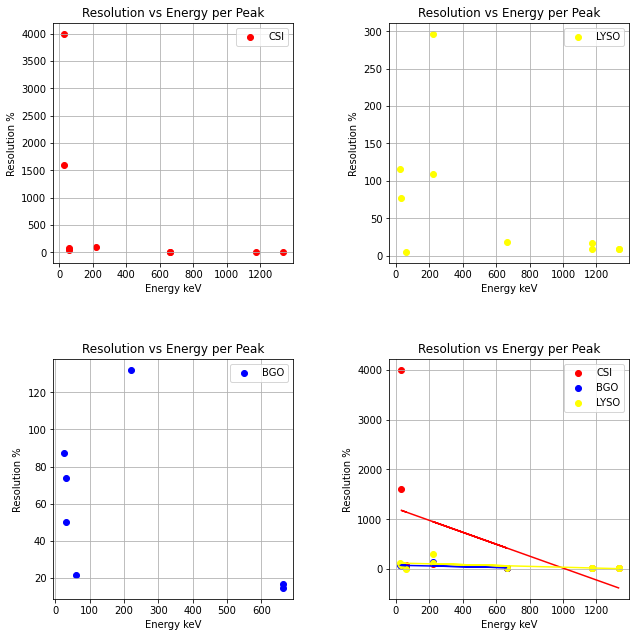

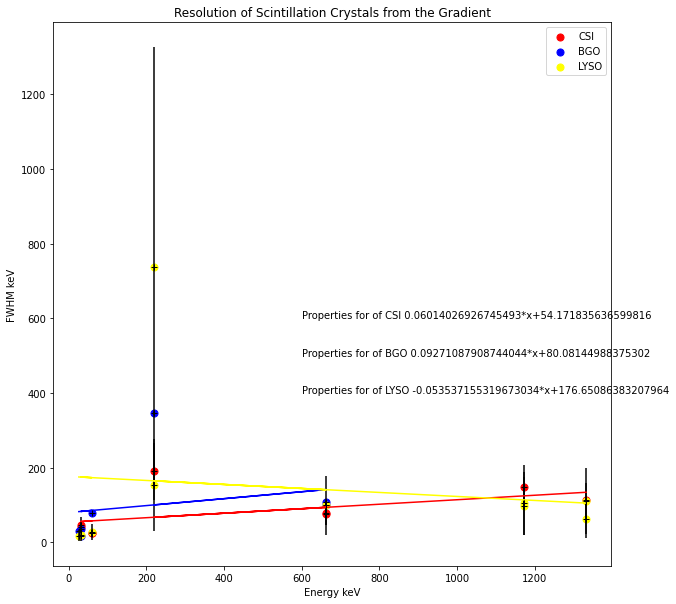

The best approximate resolutions for the crystals is given by the gradients of the graphs above such that for CSI, BGO and LYSO these are: 0.06014026926745493*x+54.171835636599816; 0.09271087908744044*x+80.08144988375302; and -0.053537155319673034*x+176.65086383207964 


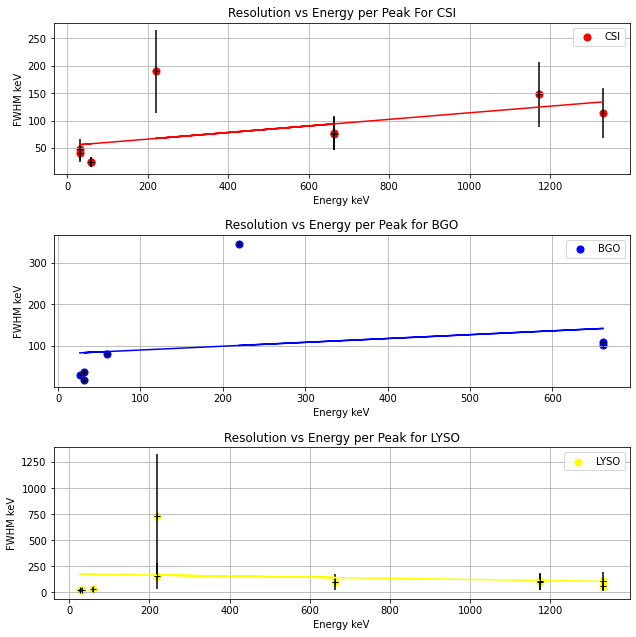

4000
651.3872655555556
the best resolutions for CSI, BGO and LYSO crystals are 0.06014026926745493 pm 0.009786789727576989, 0.09271087908744044 pm 0.007465281829851792 and -0.053537155319673034 pm 0.08438966556340466  respectively
Therefore we have for CSI, BGO and LYSO a resolution of 6.0 pm 1.0%,  9.3 pm 0.8% and -5.0 pm 9.0% respectively
These resolutions differe to that which can be caluclated by averaging all the peak resolutions per crystal as we find for CSI,BGO and LYSO have resolutions 651.3872655555556 pm 1995.501185%, 56.67366285714286 pm 58.85495999999999% and 66.286804 pm 145.84629999999999%


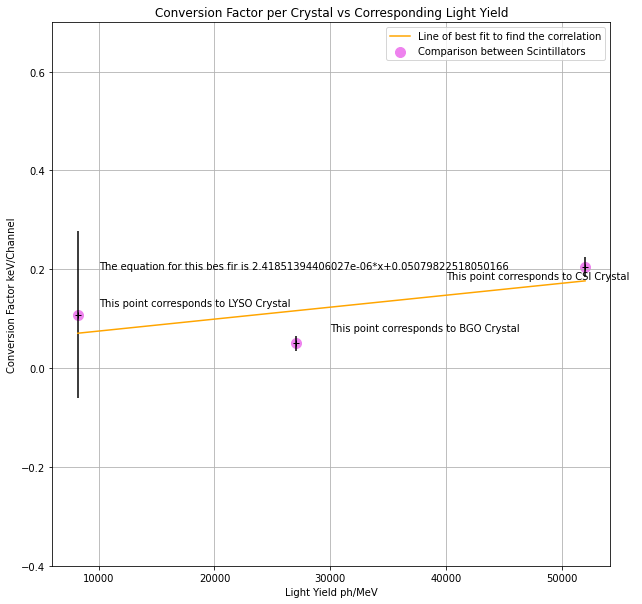

[0.019573579455153978, 0.014930563659703584, 0.16877933112680932]


In [ ]:
####DHRUV ADD LYSO CRYSTAL TO THIS PIECE OF CODE
#Energies lLiterature
#Am - $ 26.33 \pm 0.02 $ and  $ 59.55 \pm 0.05$ keV
#Cs - $31.5 \pm 0.5$ and $661.9 \pm 0.2$ keV
#Co - $220 \pm 20$ (Compton Peak), $ 1172.9 \pm 0.3$ and $ 1332.2 \pm 0.3$ keV

#AVERAGE CONVERSION FACTOR OF EACH CRYSTAL -> Energy
#Plot ADC vs Energy to get conversion factor for crystal
#Plot Counts vs Energy 
#CSI - 0.2 pm 0.2
#Am - 0.38417204301075264 and 0.23351633986928103 -> 59.55 and 59.55 keV
#Channels - 155 and 255
#Resolution - 77.41935 and 47.05882
#FWHM - 120 120
#Cs - 6.4 and 2.1333333333333333 & 0.19905263157894737 and 0.19523598820059 ->  31.5 and 31.5 & 661.9 and 661.9 keV
#Channels - 5 and 15 & 3325 and 3390
#Resolution - 4000.0 and 1600.0 & 11.42857 and 11.50442
#FWHM - 200, 240 380, 390 
#Co - 0.2131609756097561, 0.21241628959276015 and 0.21033938437253355 -> 220, 1172.9 and 1332.2 keV 
#Channels - 1025.0, 5525.0 and 6335.0
#Resolution - 92.68293,  13.39367 and 8.99763
#FWHM - 950.0, 740.0 and 570.0

#BGO - 0.05 pm 0.007
#Am - 0.04424918767507003 and 0.0378074074074074 ->  26.33 and 59.55 keV
#Channels - 595.0 and 1575.0
#Resolution - 87.39496 and 21.5873
#FWHM - 520.0 and 340.0
#Cs - 0.044755244755244755 and 0.03282051282051282 & 0.05085286208221283 and 0.04787341772151899 ->  31.5 and 31.5 & 661.9 and 661.9 keV
#Channels - 715.0 and 975 & 13015.0 and 13825.0
#Resolution - 50.34965 and 73.84615 & 16.7499 and 14.53888
#FWHM - 360.0, 720, 2180.0  and 2010.0
#Co - 0.04181626794258373 -> 220keV
#Channels - 5225
#Resolution - 132.2488
#FWHM - 6910.0

#LYSO - 0.1 pm 0.4
#Am - 0.16985978494623657 and 0.010777677224736047 -> 26.33 and 59.55
#Channels - 155 and 5525.0
#Resolution - 116.12903% and 4.88688%
#FWHM - 180 and 270
#Cs - 0.09573915151515151 and 0.010777677224736047 ->31.5, 661.9
#Channels - 275 and 7945
#Resolution - 76.36364% and 17.91855%
#FWHM - 210 and 990
#Co - 0.08792354124748492, 0.15440989399293287, 0.10308300395256917, 0.18013814274750575, and 0.10430528375733855, 0.18366643694004134 -> 220, 220, 1172.9, 1172.9 and 1332.2, 1332.2 keV 
#Channels - 1415, 2485, 6515, 11385 and 7255, 12775
#Resolution - 296.57948%,  108.83392%, 8.60782%, 16.11665% and 8.61057,  8.8215%
#FWHM - 7370, 1540, 980, 1050, 1100 , 640

CSI_Con = [0.38417204301075264, 0.23351633986928103, 6.4, 2.1333333333333333, 0.19905263157894737, 0.19523598820059, 0.2131609756097561, 0.21241628959276015, 0.21033938437253355]
CSI_E = [59.55, 59.55, 31.5, 31.5,  661.9, 661.9, 220, 1172.9, 1332.2]
CSI_ADC = [155, 255, 5, 15, 3325, 3390, 1025, 5525, 6335] 
CSI_Res = [77.41935, 47.05882, 4000.0, 1600.0, 11.42857, 11.50442, 92.68293,  13.39367, 8.99763]
CSI_FWHM = [120, 120, 200, 240, 380, 390, 950.0, 740.0, 570.0]



BGO_Con = [0.04424918767507003, 0.0378074074074074, 0.044755244755244755, 0.03282051282051282, 0.05085286208221283, 0.04787341772151899, 0.04181626794258373]
BGO_E = [26.33, 59.55, 31.5, 31.5, 661.9, 661.9, 220]
BGO_ADC = [595, 1575, 715, 975, 13015, 13825, 5225]
BGO_Res = [87.39496, 21.5873, 50.34965, 73.84615, 16.7499, 14.53888, 132.2488]
BGO_FWHM = [595.0, 1575.0, 360.0, 720, 2180.0, 2010.0, 6910.0]


LYSO_Con =[0.16985978494623657, 0.010777677224736047, 0.09573915151515151, 0.010777677224736047, 0.08792354124748492, 0.15440989399293287, 0.10308300395256917, 0.18013814274750575, 0.10430528375733855, 0.18366643694004134]
LYSO_E = [26.33, 59.55, 31.5, 661.9, 220, 220, 1172.9, 1172.9, 1332.2, 1332.2]
LYSO_ADC = [155, 5525, 275, 7945, 1415, 2485, 6515, 11385, 7255, 12775]
LYSO_Res = [116.12903, 4.88688, 76.36364, 17.91855, 296.57948,  108.83392, 8.60782, 16.11665, 8.61057,  8.8215]
LYSO_FWHM = [180, 270, 210, 990, 7370, 1540, 980, 1050, 1100 , 640 ]



#Plot Energy keV vs ADC Channels for both BGO and CSI
y_err_CSI = [0.05, 0.05, 0.5, 0.5,  0.2, 0.2, 20, 0.3, 0.3]
y_err_BGO = [0.02, 0.05, 0.5, 0.5, 0.2, 0.2, 20]
y_err_LYSO = [0.02, 0.05,0.5, 0.2, 20, 20, 0.3, 0.3, 0.3, 0.3]
plt.figure(figsize = (10,10))
a, b = np.polyfit(CSI_ADC, CSI_E, 1)
c, d = np.polyfit(BGO_ADC, BGO_E, 1)
e, f = np.polyfit(LYSO_ADC, LYSO_E, 1)
plt.scatter(CSI_ADC, CSI_E, s = 50,color ='r', label = 'CSI')
plt.plot(CSI_ADC, [a*i +b for i in CSI_ADC], 'r')
plt.scatter(BGO_ADC, BGO_E, s = 50, color = 'b', label = 'BGO')
plt.plot(BGO_ADC, [c*j+d for j in BGO_ADC], color = 'b')
plt.scatter(LYSO_ADC, LYSO_E, s = 50, color = 'yellow', label = 'LYSO')
plt.plot(LYSO_ADC, [e*j+f for j in LYSO_ADC], color = 'yellow')
plt.errorbar(CSI_ADC, CSI_E, yerr = [2*i for i in y_err_CSI], fmt = '+', color = 'black')
plt.errorbar(BGO_ADC, BGO_E, yerr = [2*i for i in y_err_BGO], fmt = '+', color = 'black')
plt.errorbar(LYSO_ADC, LYSO_E, yerr = [2*i for i in y_err_LYSO], fmt = '+', color = 'black')
plt.xlabel('ADC Channels')
plt.ylabel('Energy keV')
plt.title('Conversion Factor of Scintillation Crystals')
plt.text(3000, 1400, f'Conversion factor of CSI {a}*x+{b}' )
plt.text(8000, 200, f'Conversion factor of BGO {c}*x+{d}' )
plt.text(6000, 800, f'Conversion factor of LYSO {e}*x+{f}' )
plt.legend()
plt.show()

#Error Conversion Factor
#CSI
max_grad_CSI = (CSI_E[8] - CSI_E[3])/(CSI_ADC[8] - CSI_ADC[3])
min_grad_CSI = (CSI_E[5] - CSI_E[2])/(CSI_ADC[5] - CSI_ADC[2])
error_CSI = 0.5*((max_grad_CSI - a) + (a - min_grad_CSI))
Ave_CSI_Con = sum(CSI_Con)/len(CSI_Con)
err_Ave_CSI_Con = 0.5*((max(CSI_Con)-Ave_CSI_Con)+(Ave_CSI_Con-min(CSI_Con)))
#BGO
max_grad_BGO = (BGO_E[4] - BGO_E[6])/(BGO_ADC[4] - BGO_ADC[6])
min_grad_BGO = (BGO_E[6] - BGO_E[2])/(BGO_ADC[6] - BGO_ADC[2])
error_BGO = 0.5*((max_grad_BGO - c) + (c - min_grad_BGO))
Ave_BGO_Con = sum(BGO_Con)/len(BGO_Con)
err_Ave_BGO_Con = 0.5*((max(BGO_Con)-Ave_BGO_Con)+(Ave_BGO_Con-min(BGO_Con)))
#LYSO
max_grad_LYSO = (LYSO_E[6] - LYSO_E[5])/(LYSO_ADC[6] - LYSO_ADC[5])
min_grad_LYSO = (LYSO_E[3] - LYSO_E[4])/(LYSO_ADC[3] - LYSO_ADC[4])
error_LYSO = 0.5*((max_grad_LYSO - e) + (e - min_grad_LYSO))
Ave_LYSO_Con = sum(LYSO_Con)/len(LYSO_Con)
err_Ave_LYSO_Con = 0.5*((max(LYSO_Con)-Ave_LYSO_Con)+(Ave_LYSO_Con-min(LYSO_Con)))
print(f'the best conversion factors for CSI, BGO and LYSO crystals are {a} pm {error_CSI}, {c} pm {error_BGO} and {e} pm {error_LYSO}  respectively')
print(f'Therefore we have for CSI, BGO and LYSO a conversion factor of {0.2} pm {0.2},  {0.05} pm {0.007} and {0.1} pm {0.4} respectively')
print(f' The conversion factors for the individual crystals from averaging the peak conversion factors for CSI, BGO and LYSO come to {Ave_CSI_Con} pm {err_Ave_CSI_Con}, {Ave_BGO_Con} pm {err_Ave_BGO_Con} and {Ave_LYSO_Con} pm {err_Ave_LYSO_Con}')
#Plot Resolution vs Energy keV
fig, ax = plt.subplots(2,2,figsize = (10,10))
a1, b1 = np.polyfit(CSI_E, CSI_Res, 1)
c1, d1 = np.polyfit(BGO_E, BGO_Res, 1)
e1, f1 = np.polyfit(LYSO_E, LYSO_Res, 1)
ax[0,0].scatter(CSI_E, CSI_Res, color ='r', label = 'CSI')
ax[0,0].set_title('Resolution vs Energy per Peak')
ax[1,0].scatter(BGO_E, BGO_Res, color = 'b', label = 'BGO')
ax[1,0].set_title('Resolution vs Energy per Peak')
ax[0,1].scatter(LYSO_E, LYSO_Res, color = 'yellow', label = 'LYSO')
ax[0,1].set_title('Resolution vs Energy per Peak')
ax[1,1].scatter(CSI_E, CSI_Res, color ='r', label = 'CSI')
ax[1,1].plot(CSI_E, [a1*i +b1 for i in CSI_E], 'r')
ax[1,1].scatter(BGO_E, BGO_Res, color = 'b', label = 'BGO')
ax[1,1].plot(BGO_E, [c1*j+d1 for j in BGO_E], color = 'b')
ax[1,1].scatter(LYSO_E, LYSO_Res, color = 'yellow', label = 'LYSO')
ax[1,1].plot(LYSO_E, [e1*j+f1 for j in LYSO_E], color = 'yellow')
ax[1,1].set_title('Resolution vs Energy per Peak')
for ax in ax.flat:    
    ax.set_xlabel('Energy keV')
    ax.set_ylabel('Resolution %')
    ax.grid('on')
    ax.legend(loc='best')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

#Plot FWHM vs Energy for  LYSO, BGO and CSI
y_err_LYSO1 = [i*0.4 for i in [j*0.1 for j in LYSO_FWHM]]
y_err_CSI1 = [i*0.2 for i in [j*0.2 for j in CSI_FWHM]]
y_err_BGO1 = [i*0.007 for i in [j*0.05 for j in BGO_FWHM]]
plt.figure(figsize = (10,10))
a2, b2 = np.polyfit(CSI_E, [i*0.2 for i in CSI_FWHM], 1)
c2, d2 = np.polyfit(BGO_E, [i*0.05 for i in BGO_FWHM], 1)
e2, f2 = np.polyfit(LYSO_E, [i*0.1 for i in LYSO_FWHM], 1)
plt.scatter(CSI_E, [i*0.2 for i in CSI_FWHM], s = 50,color ='r', label = 'CSI')
plt.plot(CSI_E, [a2*i +b2 for i in CSI_E], 'r')
plt.errorbar(CSI_E, [i*0.2 for i in CSI_FWHM], yerr = [2*i for i in y_err_CSI1], fmt = '+', color = 'black')
plt.scatter(BGO_E, [i*0.05 for i in BGO_FWHM], s = 50, color = 'b', label = 'BGO')
plt.plot(BGO_E, [c2*j+d2 for j in BGO_E], color = 'b')
plt.errorbar(BGO_E, [i*0.05 for i in BGO_FWHM], yerr = [2*i for i in y_err_BGO1], fmt = '+', color = 'black')
plt.scatter(LYSO_E, [i*0.1 for i in LYSO_FWHM], s = 50, color = 'yellow', label = 'LYSO')
plt.plot(LYSO_E, [e2*j+f2 for j in LYSO_E], color = 'yellow')
plt.errorbar(LYSO_E, [i*0.1 for i in LYSO_FWHM], yerr = [2*i for i in y_err_LYSO1], fmt = '+', color = 'black')
plt.xlabel('Energy keV')
plt.ylabel('FWHM keV')
plt.title('Resolution of Scintillation Crystals from the Gradient')
plt.text(600, 600, f'Properties for of CSI {a2}*x+{b2}' )
plt.text(600, 500, f'Properties for of BGO {c2}*x+{d2}' )
plt.text(600, 400, f'Properties for of LYSO {e2}*x+{f2}' )
plt.legend()
plt.show()

#Plot FWHM vs Energy for  LYSO, BGO and CSI
fig, ax = plt.subplots(3,1,figsize = (10,10))
y_err_LYSO = [i*0.4 for i in [j*0.1 for j in LYSO_FWHM]]
y_err_CSI = [i*0.2 for i in [j*0.2 for j in CSI_FWHM]]
y_err_BGO = [i*0.007 for i in [j*0.05 for j in BGO_FWHM]]
a3, b3 = np.polyfit(CSI_E, [i*0.2 for i in CSI_FWHM], 1)
c3, d3 = np.polyfit(BGO_E, [i*0.05 for i in BGO_FWHM], 1)
e3, f3 = np.polyfit(LYSO_E, [i*0.1 for i in LYSO_FWHM], 1)
ax[0].scatter(CSI_E, [i*0.2 for i in CSI_FWHM], s = 50,color ='r', label = 'CSI')
ax[0].plot(CSI_E, [a3*i +b3 for i in CSI_E], 'r')
ax[0].errorbar(CSI_E, [i*0.2 for i in CSI_FWHM], yerr = [2*i for i in y_err_CSI], fmt = '+', color = 'black')
ax[0].set_title('Resolution vs Energy per Peak For CSI')
ax[1].scatter(BGO_E, [i*0.05 for i in BGO_FWHM], s = 50, color = 'b', label = 'BGO')
ax[1].plot(BGO_E, [c3*j+d3 for j in BGO_E], color = 'b')
ax[1].errorbar(BGO_E, [i*0.05 for i in BGO_FWHM], yerr = [2*i for i in y_err_BGO], fmt = '+', color = 'black')
ax[1].set_title('Resolution vs Energy per Peak for BGO')
ax[2].scatter(LYSO_E, [i*0.1 for i in LYSO_FWHM], s = 50, color = 'yellow', label = 'LYSO')
ax[2].plot(LYSO_E, [e3*j+f3 for j in LYSO_E], color = 'yellow')
ax[2].errorbar(LYSO_E, [i*0.1 for i in LYSO_FWHM], yerr = [2*i for i in y_err_LYSO], fmt = '+', color = 'black')
ax[2].set_title('Resolution vs Energy per Peak for LYSO')
for ax in ax.flat:    
    ax.set_xlabel('Energy keV')
    ax.set_ylabel('FWHM keV')
    ax.grid('on')
    ax.legend(loc='best')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
print(f'The best approximate resolutions for the crystals is given by the gradients of the graphs above such that for CSI, BGO and LYSO these are: {a3}*x+{b3}; {c3}*x+{d3}; and {e3}*x+{f3} ' )
plt.show()

#Error Resolution
#CSI
max_grad_CSI_R = ((CSI_FWHM[7]+y_err_CSI[7]) - (CSI_FWHM[1]- y_err_CSI[1]))*0.2/(CSI_E[7] - CSI_E[1])
min_grad_CSI_R = ((CSI_FWHM[-1]-y_err_CSI[-1]) - (CSI_FWHM[6] + y_err_CSI[6]))*0.2/(CSI_E[-1] - CSI_E[6])
error_CSI_R = 0.5*((max_grad_CSI - a3) + (a3 - min_grad_CSI))

#BGO
max_grad_BGO_R = ((BGO_FWHM[-1]+y_err_BGO[-1]) - (BGO_FWHM[2]-y_err_BGO[2]))*0.05/(BGO_E[-1] - BGO_E[2])
min_grad_BGO_R = ((BGO_FWHM[5]-y_err_BGO[5]) - (BGO_FWHM[-1]+y_err_BGO[-1]))*0.05/(BGO_E[5] - BGO_E[-1])
error_BGO_R = 0.5*((max_grad_BGO - c3) + (c3 - min_grad_BGO))

#LYSO
max_grad_LYSO_R = ((LYSO_E[5] + y_err_LYSO[5]) - (LYSO_E[2]-y_err_LYSO[2]))*0.1/(LYSO_ADC[5] - LYSO_ADC[2])
min_grad_LYSO_R = ((LYSO_E[3] - y_err_LYSO[3])  - (LYSO_E[5] + y_err_LYSO[5]))*0.1/(LYSO_ADC[3] - LYSO_ADC[5])
error_LYSO_R = 0.5*((max_grad_LYSO - e3) + (e3 - min_grad_LYSO))

#AVERAGE RESOLUTION
Ave_CSI_RES = sum(CSI_Res)/len(CSI_Res)
print(int(max(CSI_Res)))
print(Ave_CSI_RES)
err_Ave_CSI_RES = 0.5*((max(CSI_Res)- Ave_CSI_RES)+(Ave_CSI_RES - min(CSI_Res)))
Ave_BGO_RES = sum(BGO_Res)/len(BGO_Res)
err_Ave_BGO_RES = 0.5*((max(BGO_Res) - Ave_BGO_RES)+(Ave_BGO_RES - min(BGO_Res)))
Ave_LYSO_RES = sum(LYSO_Res)/len(LYSO_Res)
err_Ave_LYSO_RES = 0.5*((max(LYSO_Res) - Ave_LYSO_RES)+(Ave_LYSO_RES - min(LYSO_Res)))
print(f'the best resolutions for CSI, BGO and LYSO crystals are {a3} pm {error_CSI_R}, {c3} pm {error_BGO_R} and {e3} pm {error_LYSO_R}  respectively')
print(f'Therefore we have for CSI, BGO and LYSO a resolution of {6.0} pm {1.0}%,  {9.3} pm {0.8}% and {-5.0} pm {9.0}% respectively')
print(f'These resolutions differe to that which can be caluclated by averaging all the peak resolutions per crystal as we find for CSI,BGO and LYSO have resolutions {Ave_CSI_RES} pm {err_Ave_CSI_RES}%, {Ave_BGO_RES} pm {err_Ave_BGO_RES}% and {Ave_LYSO_RES} pm {err_Ave_LYSO_RES}%')


#Light Yield vs Conversion Factor 
Con_Crystals = [a,c,e]
err_Con_Crystals = [error_CSI, error_BGO, error_LYSO]
Light_Yield_ph_MeV = [52000, 27000, 8200]
u, z = np.polyfit(Light_Yield_ph_MeV, Con_Crystals, 1)
plt.figure(figsize = (10,10))
plt.scatter(Light_Yield_ph_MeV, Con_Crystals, s = 100,  c ='violet', label = 'Comparison between Scintillators')
plt.plot(Light_Yield_ph_MeV, [u*i+z for i in Light_Yield_ph_MeV], 'orange', label = 'Line of best fit to find the correlation')
plt.errorbar(Light_Yield_ph_MeV, Con_Crystals, yerr = [2*i for i in err_Con_Crystals], fmt = '+', color = 'black')
plt.text(40000, 0.18, 'This point corresponds to CSI Crystal  ' )
plt.text(30000, 0.075, 'This point corresponds to BGO Crystal  ' )
plt.text(10000, 0.125, 'This point corresponds to LYSO Crystal  ' )
plt.text(10000, 0.2, f'The equation for this bes fir is {u}*x+{z}  ' )
plt.ylim([-0.4, 0.7])
plt.title('Conversion Factor per Crystal vs Corresponding Light Yield')
plt.xlabel('Light Yield ph/MeV')
plt.ylabel('Conversion Factor keV/Channel')
plt.grid()
plt.legend()
plt.show()
print([2*i for i in err_Con_Crystals])

In [ ]:
#Conversion Factor vs Light Yield
#Error of FWHM_Energy - ERROR_Z = c*ERROR_A